# Credit Card Fraud Detection

*The project deals with the dataset having both fraud and non-fraud transactions. And different models are traning to find the model with best performance.*

# Data Loading

## Import the libraries

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [489]:
df = pd.read_csv('creditcard.csv')
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [490]:
# Shows top 5 rows in the dataset
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# Exploratory Data Analysis

## Understanding dataset

In [491]:
# Tuple of array dimensions that tells the number of rows and columns of a given DataFrame.
df.shape

(284807, 31)

In [492]:
# Allows us to learn the shape of object types of our data.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [493]:
# Gives us summary statistics for numerical columns in our DataFrame.
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [494]:
# To transpose index and columns of the data frame.
df.describe().T 

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.918649e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.682686e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.761736e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.811118e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552103e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.040130e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.698953e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.893285e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.147640e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.772925e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.289524e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.803266e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.674888e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.475621e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.501098e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392460e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.466538e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.258754e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.019919e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.126845e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.473120e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  8.042109e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.282512e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.456271e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.426896e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.701640e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.662252e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.217809e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

*There are no null values in the dataset.* 

## Handling missing values

In [495]:
# Check missing values.
df.isnull().values.sum()

0

In [496]:
# Checking the number of missing values in each column.
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [497]:
# Cheking percent of missing values in columns.
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0

In [498]:
# Check if there are any duplicate rows
df.duplicated(keep=False).sum()

1854

*There are 1854 similar values*

In [499]:
# Delete duplicate rows 
df = df.drop_duplicates() 

In [500]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[283726 rows x 31 columns]

*Duplicate values has been removed*

# Data Visualization

## Distribution of the classes

In [501]:
classes = df['Class'].value_counts()
classes

0    283253
1       473
Name: Class, dtype: int64

In [502]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [503]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

Text(0.5, 1.0, 'Boxplot of entire dataset')

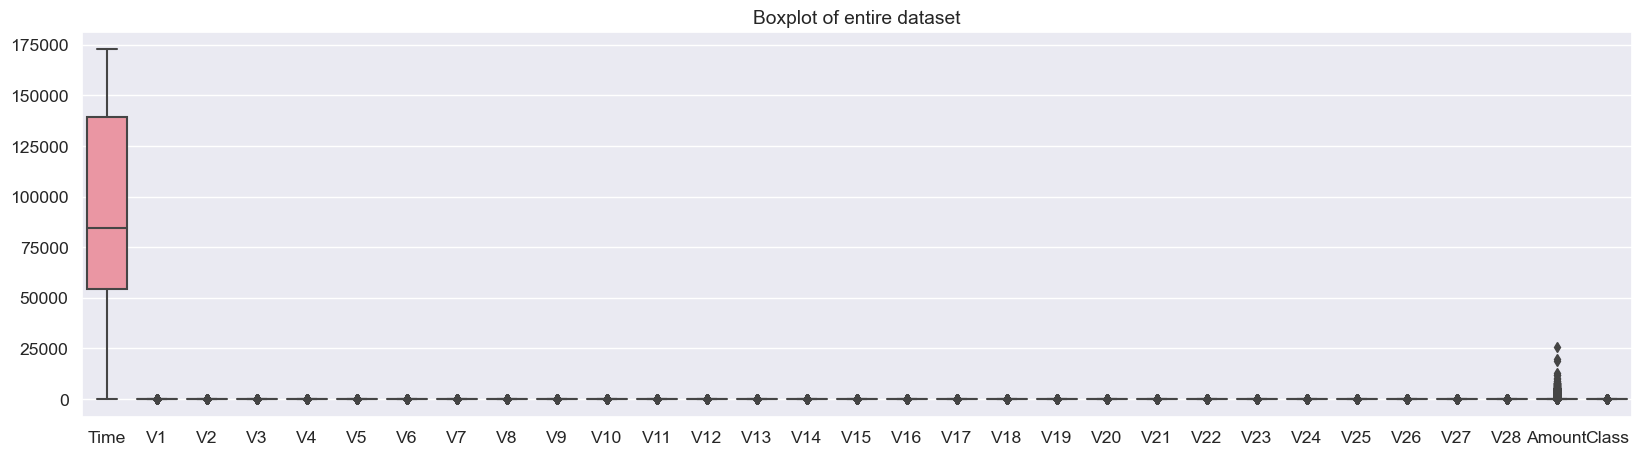

In [504]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df)
plt.title("Boxplot of entire dataset")

## a. Univariate Analysis 

In [505]:
df["Class"].describe()

count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [506]:
plt.title('The proportion of fraudulent vs non-fraudulent transactions')
df['Class'].value_counts().plot(kind='pie', autopct="%.2f%%", labels=['Not Fraud','Fraud'],
                                        startangle = 90, colors = ['#C35617', '#FFDEAD'])
plt.show();
print(df.Class.value_counts())

0    283253
1       473
Name: Class, dtype: int64


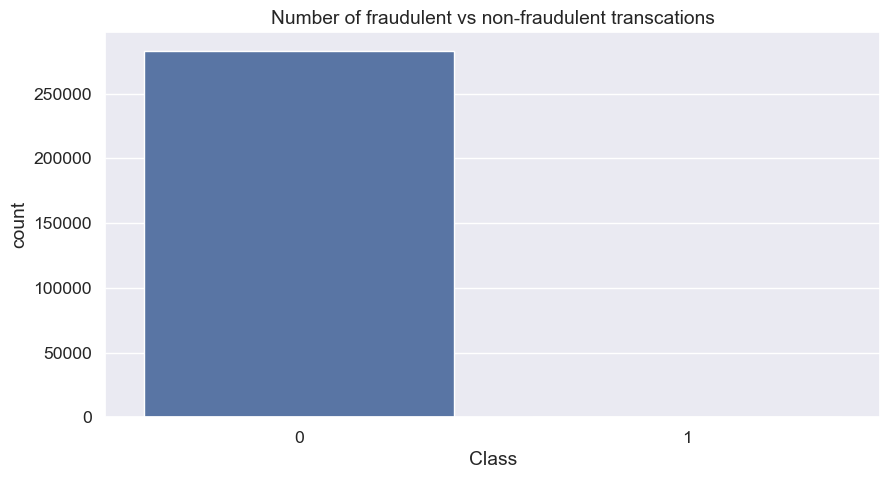

0    283253
1       473
Name: Class, dtype: int64


In [507]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show();

print(df['Class'].value_counts())

Text(0.5, 1.0, 'Number of fraudulent vs non-fraudulent transcations')

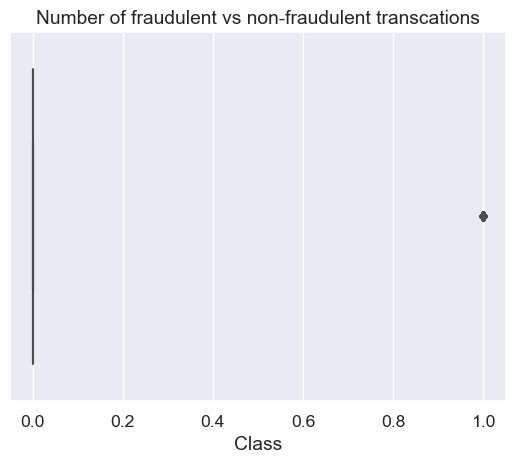

In [508]:
# B plot for the number of fraudulent vs non-fraudulent transcations
sns.boxplot(x='Class',data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')

*Class: No credit fraud is 284315 and credit fraud is 492. 
Therefore, data is in imbalanced form.*

## b. Bivariate Analysis

In [509]:
# Time statistical summary across fraud and not fraud transactions.
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Not Fraud")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


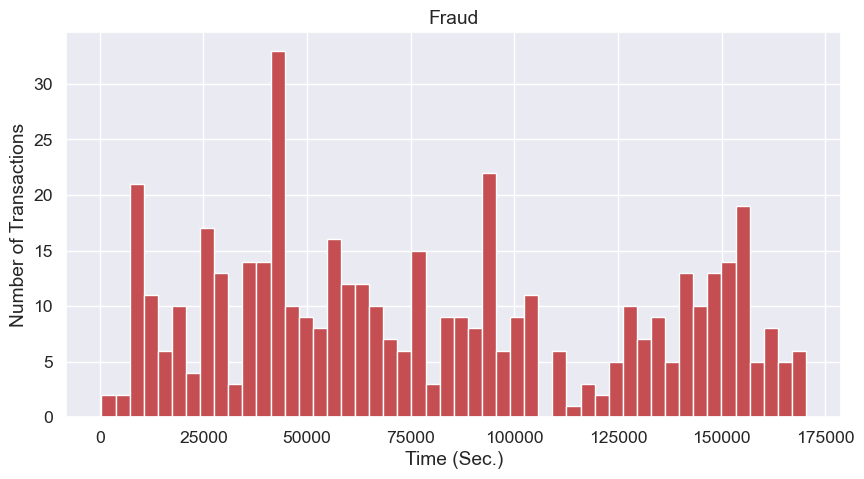

In [510]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(10,5))
bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins, color='r')
ax1.set_title('Fraud')
plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show();

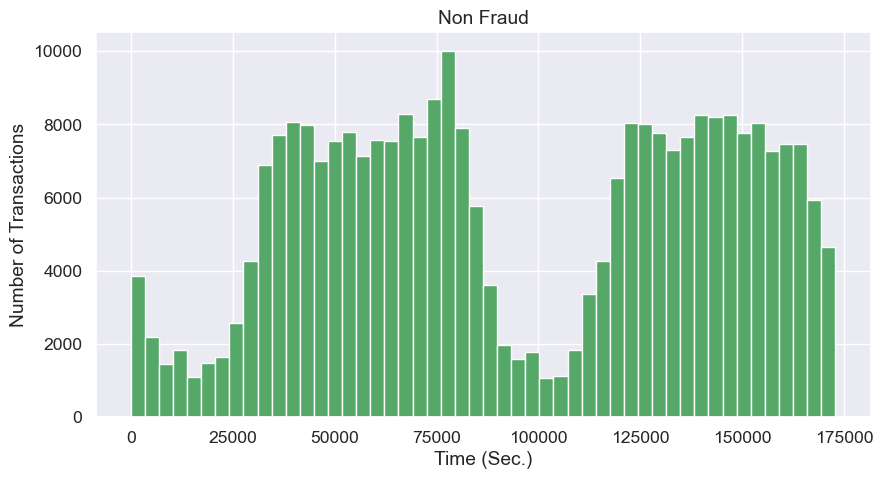

In [511]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(10,5))
bins = 50

ax1.hist(df.Time[df.Class == 0], bins = bins, color='g')
ax1.set_title('Non Fraud')
plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show();

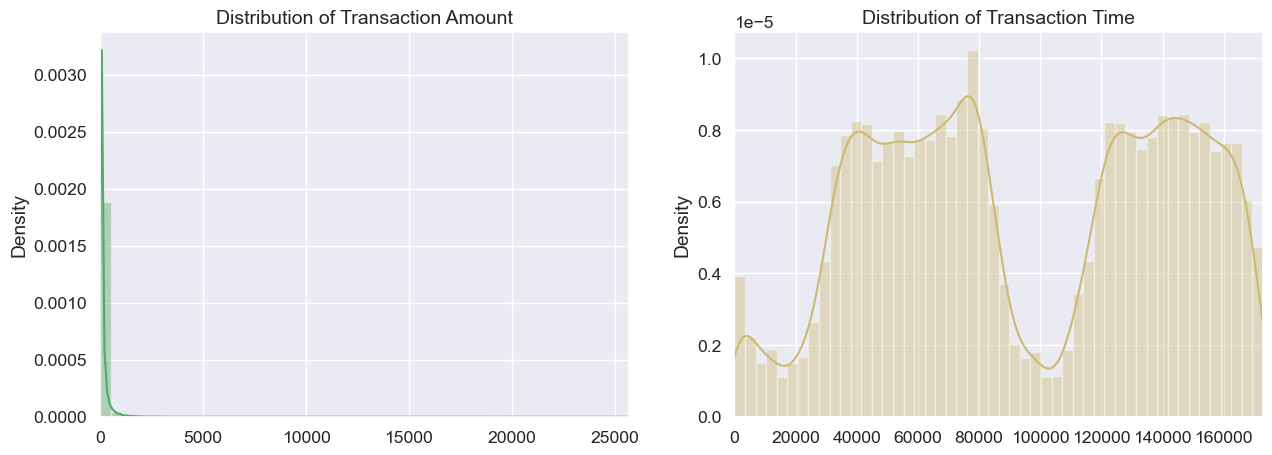

In [512]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='y')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show();

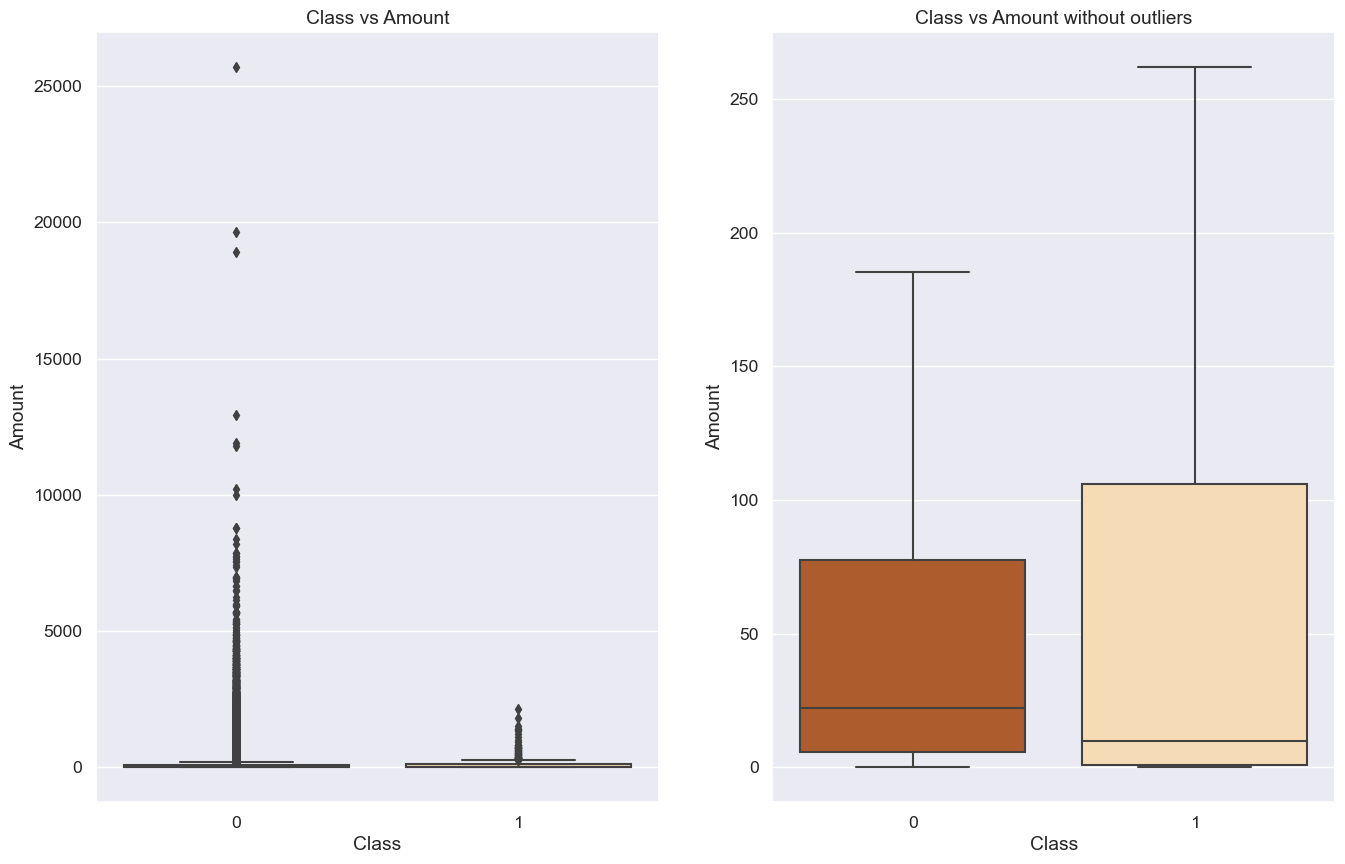

In [513]:
f, axes = plt.subplots(ncols=2, figsize=(16,10))
colors = ['#C35617', '#FFDEAD']

sns.boxplot(x="Class", y="Amount", data=df, palette = colors, ax=axes[0], showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=df, palette = colors, ax=axes[1], showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show();

## c. Multivariate Analysis

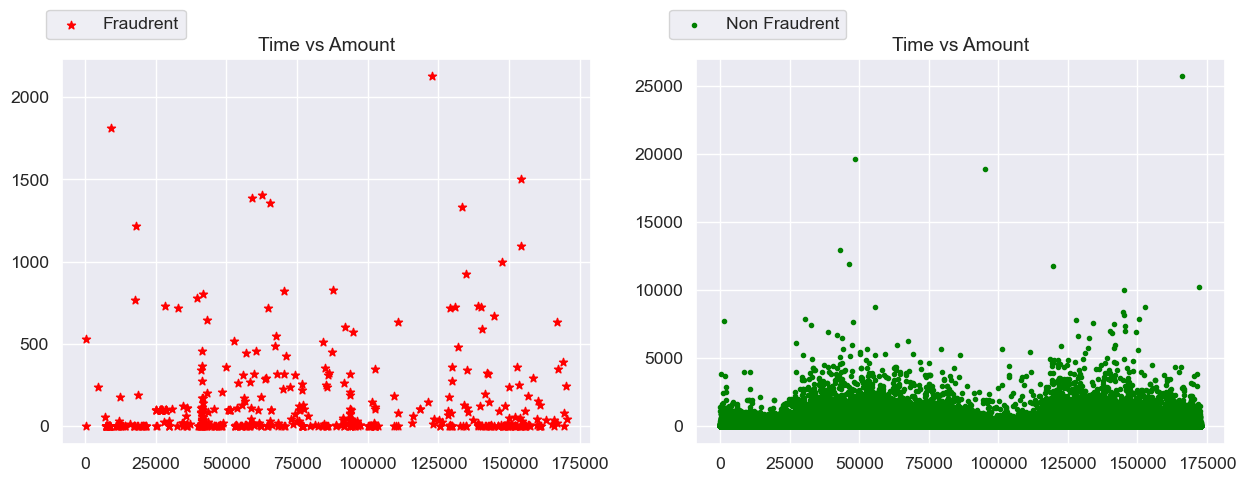

In [514]:
# Plot relation with different scale
df1 = df[df['Class']==1]
df2 = df[df['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'], df1['Amount'], color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'], df2['Amount'], color='green', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

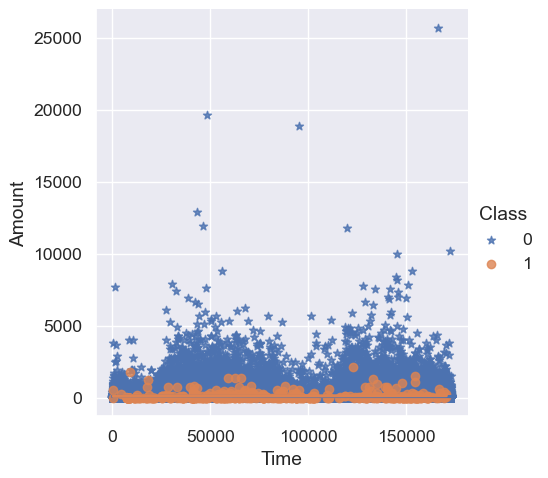

In [515]:
sns.lmplot(x='Time', y='Amount', hue='Class', markers=['*', 'o'], data=df, height=5);

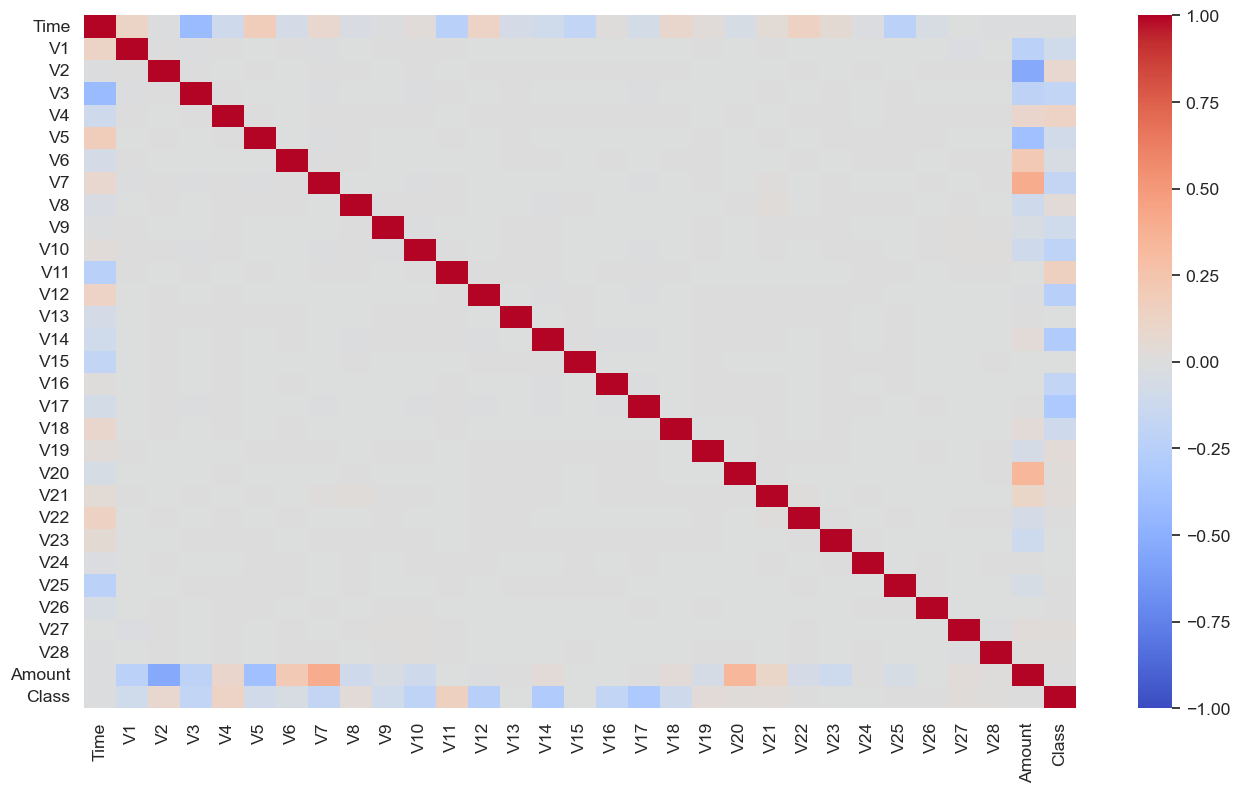

In [516]:
sns.set(font_scale=1.15)
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1);

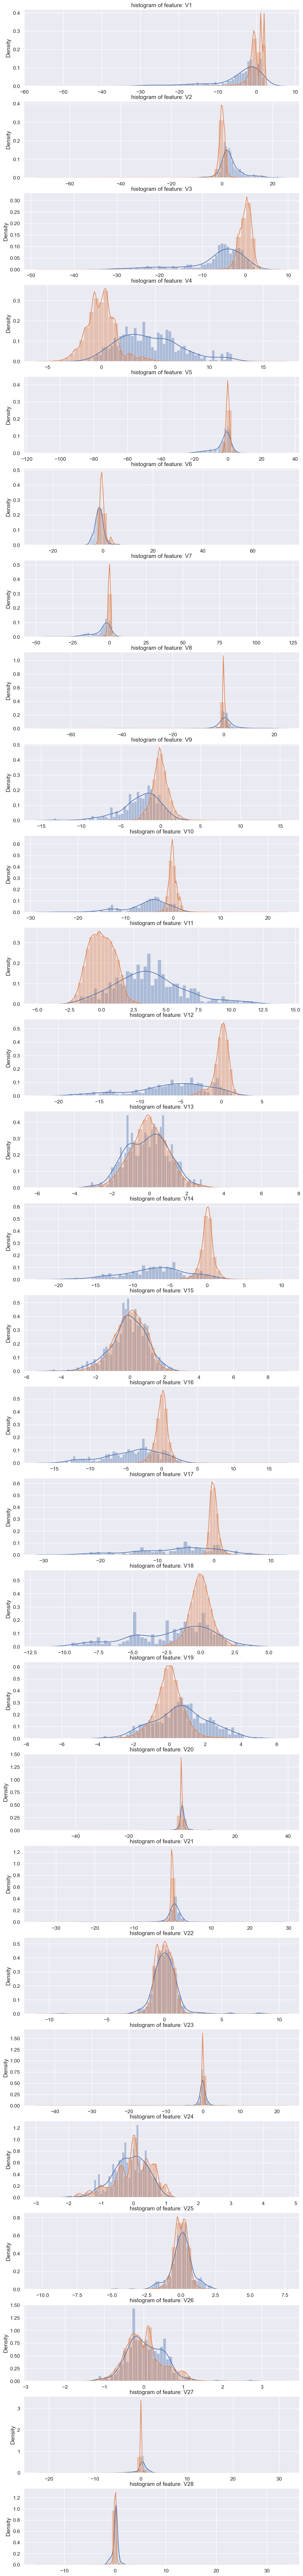

In [517]:
var = df.columns.values
from matplotlib.gridspec import GridSpec
#Select only the anonymized features.
colval = var[1:29]
len(colval)

plt.figure(figsize=(12,28*4))
gs = GridSpec(28, 1)
for i, cn in enumerate(df[colval]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show();

*From the above visualization we understand that,*

*V1, V2, V3, V10 have different configuration,                                                                                V4, V11 has clearly separated distributions for Class 0 & 1 values,
V12, V14, V18 are partially separated
And V25, V26, V28 have the same configuration for the two values of Class.*

# Data Transformation

In [518]:
#To find the pairwise correlation of all columns in the Pandas Dataframe in Python
corr_matrix = df.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='Oranges')

In [519]:
cor_target = df.corrwith(df["Class"])
cor_target.sort_values(axis = 0, ascending = False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
dtype: float64

## Distribution of classes with time

In [520]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

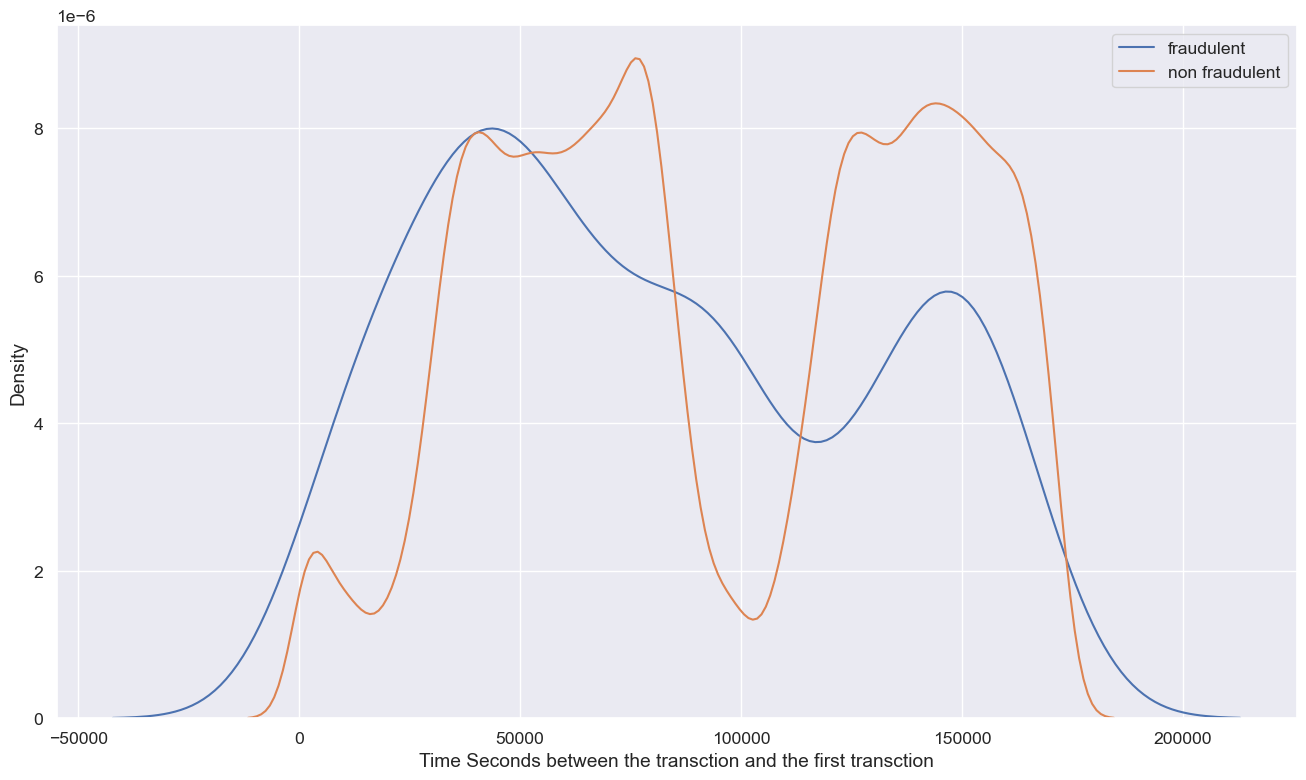

In [521]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel = 'Time Seconds between the transction and the first transction')
plt.legend()
plt.show();

*Since, there is no specific pattern visible. We can drop time.*

In [522]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

In [523]:
df

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.018307  0.277838   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.247998  0.771679   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274   
4       0.592941 -0.270533  0.817739  0.753074  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  0.213454  0.111864   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.214205  0.924384   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.232045  0.578229   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.265245  0.800049   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[283726 rows x 30 columns]

In [524]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

## Distribution of classes with amount

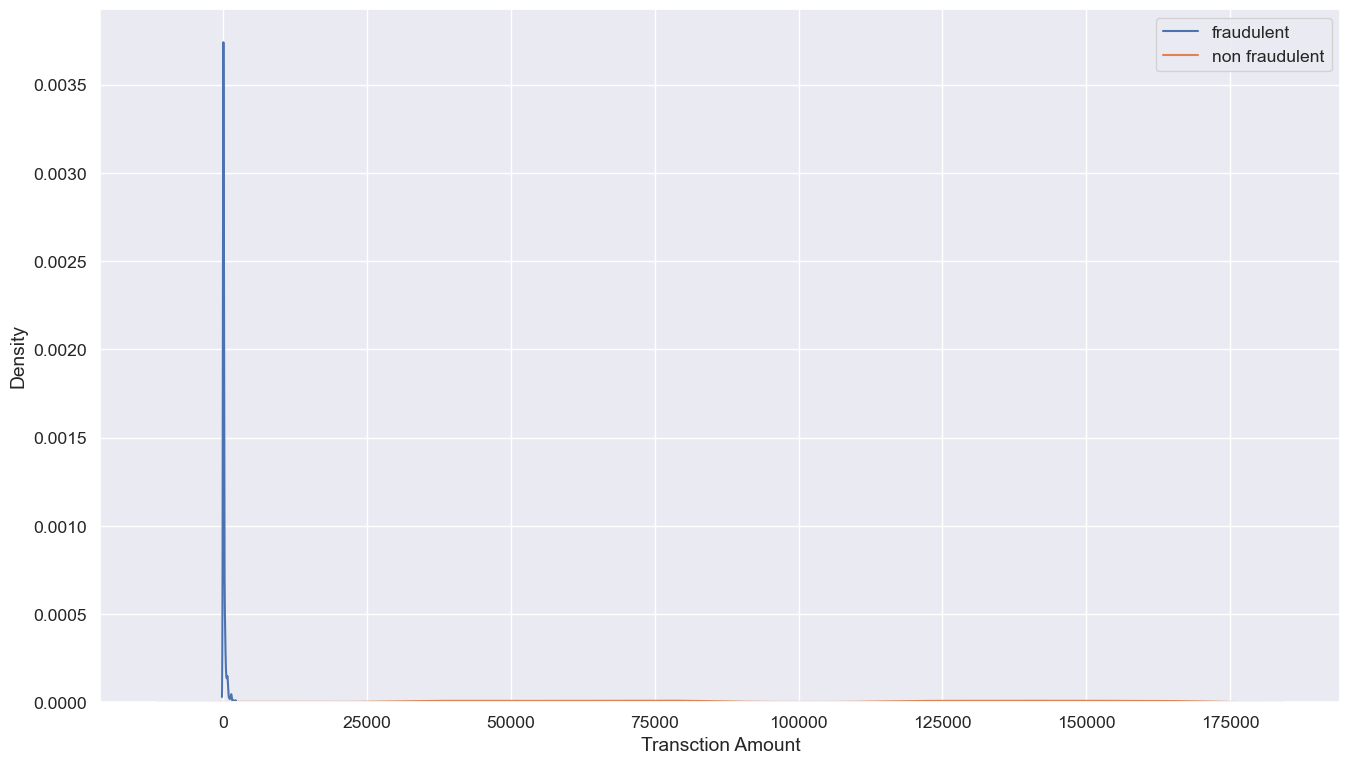

In [525]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Amount'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel='Transction Amount')
plt.legend()
plt.show();

*Since, we can see fraud data present in the bottom in dense form and non-fraud data present throughout the low to high range. We can consider amount.*

*As we have seen that the data is severely imbalanced, only 0.17% of transactions are fraudulent, we should not consider Accuracy as a good metric to evaluate the model. Therefore, we have to use ROC-AUC score to evaluate the model fairly.*

## Spliting train and test data

In [526]:
# Import library
from sklearn.model_selection import train_test_split

In [527]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [528]:
# Putting target variable to y
y = df['Class']

In [529]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling

In [530]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [531]:
# Instantiate the Scaler
scaler = StandardScaler()

In [532]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [533]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
49578  -1.550810  0.731824  2.549028  2.733753  0.250049  2.870749  0.354236   
56032  -1.305339  1.059107  1.586936  1.650134  1.669107 -0.680811  0.717706   
272370 -1.498534  1.268183 -1.360645 -1.310035  2.744320  3.666680  0.234403   
13917   1.198304  0.378397  0.541355  0.835317 -0.386506 -0.829408 -0.137542   
132654 -0.833194  0.769305  0.865990 -2.250385  1.018626  0.090372  0.751702   

              V8        V9       V10  ...       V20       V21       V22  \
49578   0.007231 -0.037368  1.419594  ... -0.312468  0.005203  0.831394   
56032   0.072364 -1.664982 -0.693306  ...  0.117144 -0.101308 -0.557447   
272370  0.502133  0.313536  1.060169  ... -0.053535 -0.067233 -0.546292   
13917  -0.121206  1.122380 -0.470237  ... -0.149218 -0.377945 -0.909802   
132654  0.149752 -0.268840 -0.716749  ... -0.038624 -0.020569 -0.044707   

             V23       V24       V25       V26       V27       V28    Amount  
49578   0.117041 -0.935059 -0.665162  0.188614 -0.910417 -0.273559  0.008282  
56032  -0.121542 -0.058211  0.390341 -0.219061  0.017214  0.108434 -0.324396  
272370  0.212806  0.703104 -0.805702  0.195482 -1.110255  0.304176 -0.341687  
13917   0.158471  0.420259  0.117492  0.027304 -0.057095  0.015486 -0.340489  
132654 -0.211529 -1.094250 -0.174526  0.678921  0.117100  0.158518 -0.351151  

[5 rows x 29 columns]

In [534]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
174240  1.933240 -1.316851  0.425610 -0.354184 -1.854467 -0.021007 -1.602457   
277496 -1.592290  1.511862 -1.410847 -1.175748  2.867225  3.524474  0.495902   
105198 -0.976564  0.585510 -0.003142 -0.945268  3.539277  2.916666  0.460135   
227782  1.780293 -1.063671  0.680026  0.841410 -1.653529  0.392116 -1.514345   
116080 -1.153910  1.533617  0.434139 -0.495930  0.378126 -0.067809  0.530507   

              V8        V9       V10  ...       V20       V21       V22  \
174240  0.219034  0.271361  0.937272  ... -0.484497 -0.069772  0.311095   
277496  1.614884 -1.271709 -1.257424  ... -0.379965  0.100349 -0.083137   
105198  0.831828 -1.095137 -0.601215  ...  0.101061 -0.297875 -1.264529   
227782  0.467485  2.093653  0.028845  ... -0.227392  0.203172  0.798490   
116080  0.229062  0.300117  0.817031  ...  0.497949 -0.456433 -0.912641   

             V23       V24       V25       V26       V27       V28    Amount  
174240  0.293697  0.082676 -0.745557  0.597068  0.016508 -0.031391 -0.139189  
277496 -0.474007  0.695183  1.356110 -0.486276 -0.350054 -0.118218 -0.183394  
105198 -0.179137  0.936423  0.677656 -0.705164  0.000772  0.064120 -0.346758  
227782  0.178572  0.094661 -0.515228  0.371839  0.026977 -0.036803 -0.163268  
116080 -0.160596 -0.944142  0.048795  0.090333  0.100562 -0.249673 -0.314852  

[5 rows x 29 columns]

# Model building on imbalanced data

In [535]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [536]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuPu',
                xticklabels=['0','1'], 
                yticklabels=['0','1'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

In [537]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC_AUC(Y, Y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(Y, Y_prob)
    # caculate scores
    model_auc = roc_auc_score(Y, Y_prob)
    # plot roc curve for the model
    plt.figure(figsize=(16, 9))
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' % (model_auc))
    # show axis labels and the legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show(block=False)
    return

# Logistic Regression

### Logistic Regression Model on the Training set

In [538]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_test_pred)

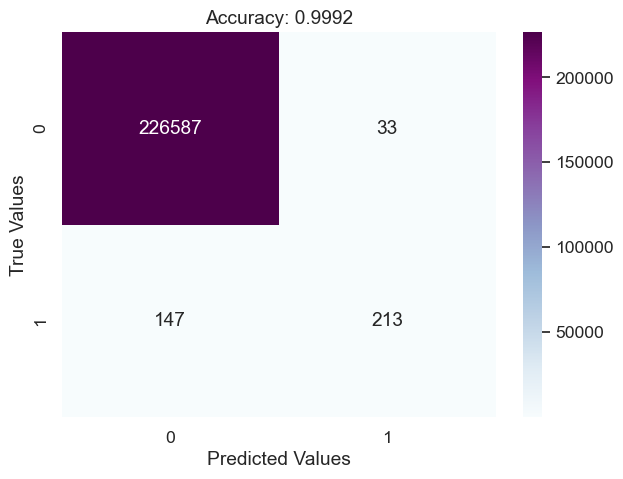



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       0.87      0.59      0.70       360

    accuracy                           1.00    226980
   macro avg       0.93      0.80      0.85    226980
weighted avg       1.00      1.00      1.00    226980



In [539]:
# Train Predictions
Visualize_confusion_matrix(y_train, y_train_pred)

In [540]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train, y_train_pred))

Recall score: 0.5917
Precision score: 0.8659
F1-Score: 0.7030
Accuracy score: 0.9992
AUC: 0.7958


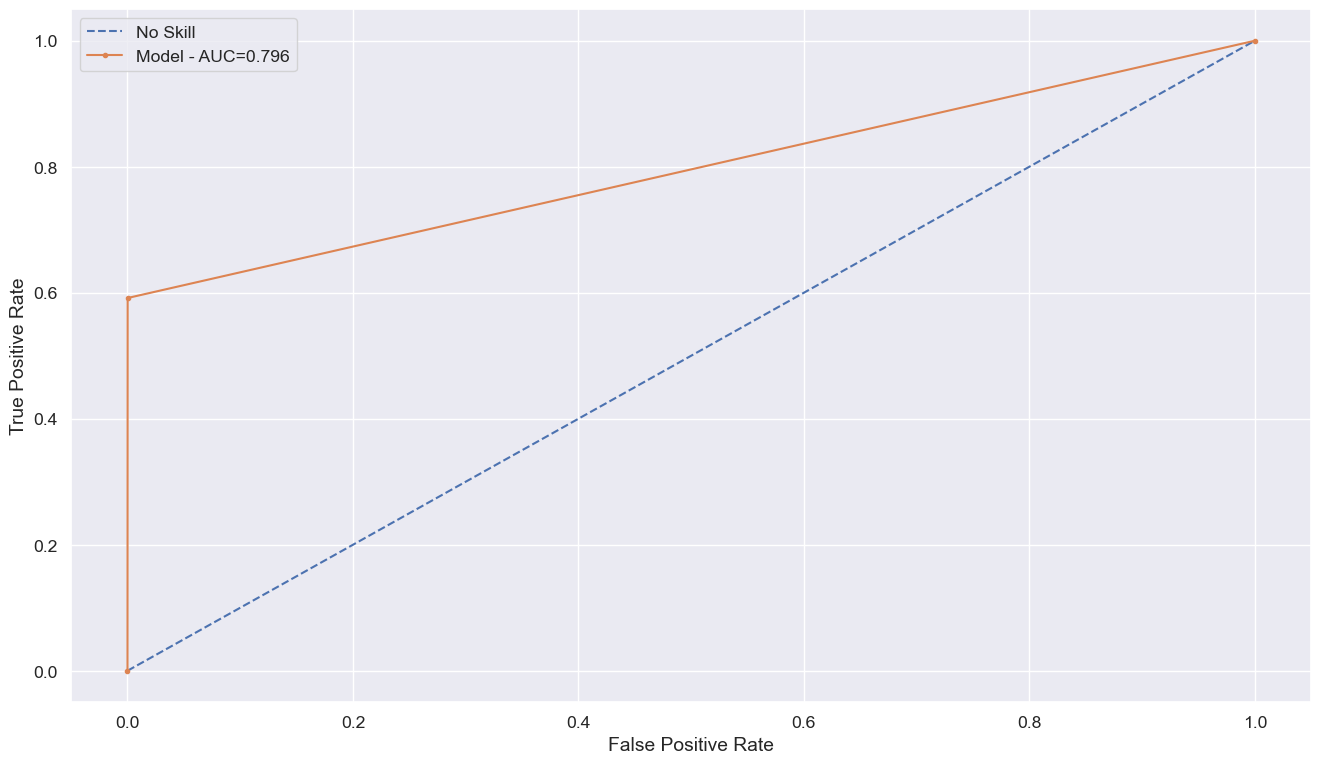

In [541]:
ROC_AUC(y_train, y_train_pred)

### Logistic Regression Model on the Testing set

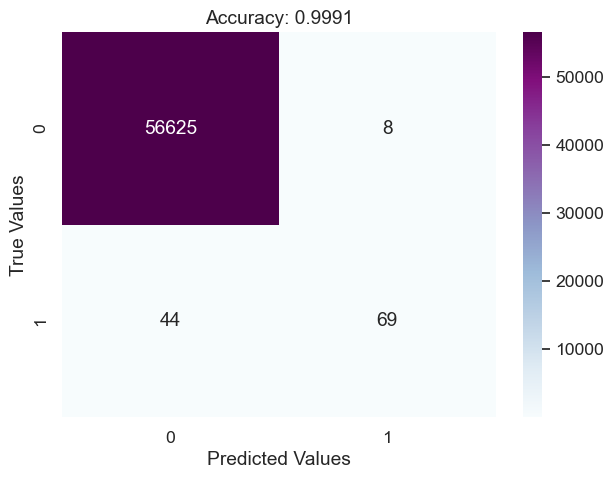



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.90      0.61      0.73       113

    accuracy                           1.00     56746
   macro avg       0.95      0.81      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [542]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [543]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.6106
Precision score: 0.8961
F1-Score: 0.7263
Accuracy score: 0.9991
AUC: 0.8052


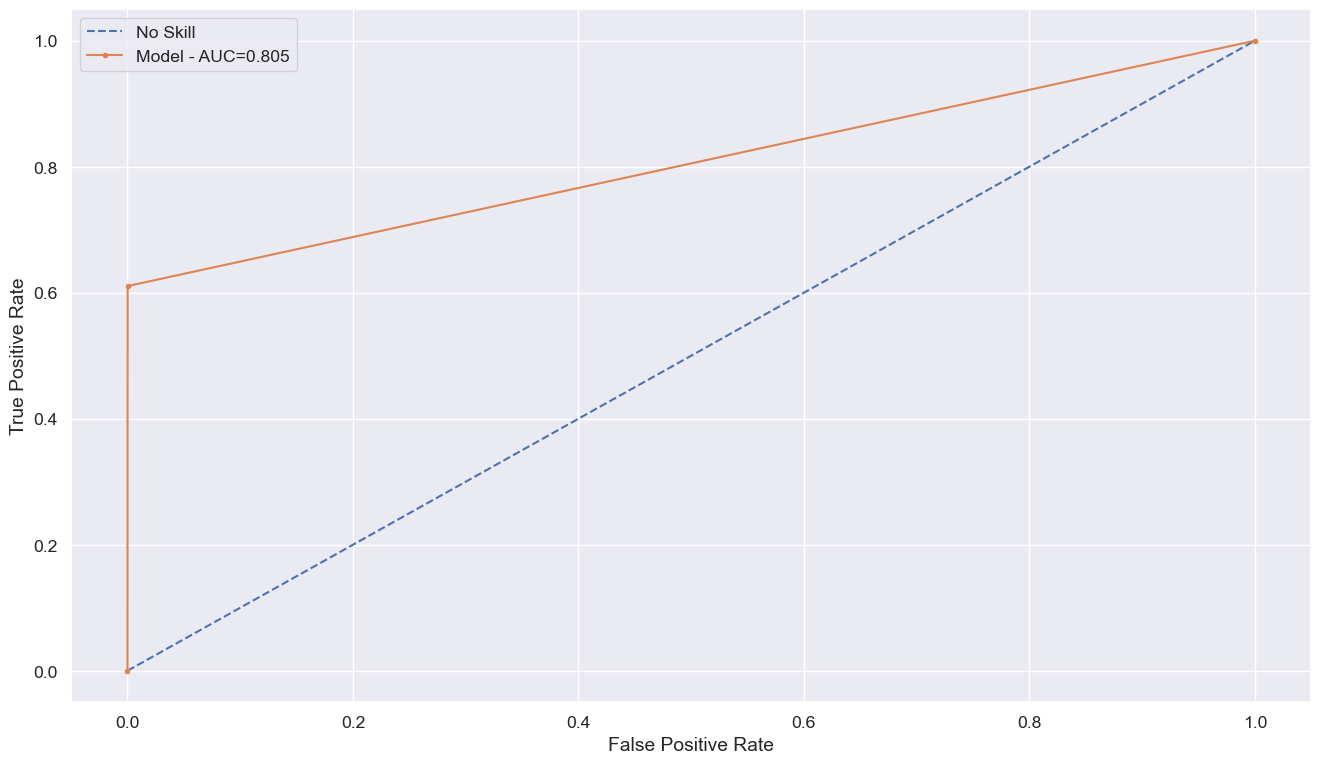

In [544]:
ROC_AUC(y_test, y_test_pred)

# Decision Tree

### Decision Tree Classification Model on Train set

In [545]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_train_pred = DTR_model.predict(X_train)
y_test_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_test_pred)

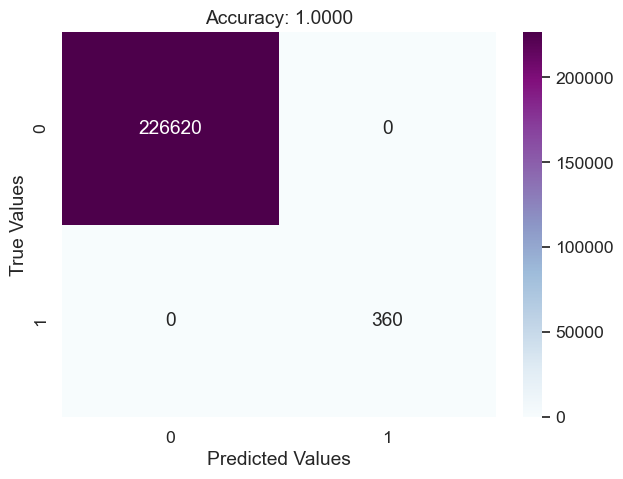



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00       360

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



In [546]:
# Train Predictions
Visualize_confusion_matrix(y_train, y_train_pred)

In [547]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


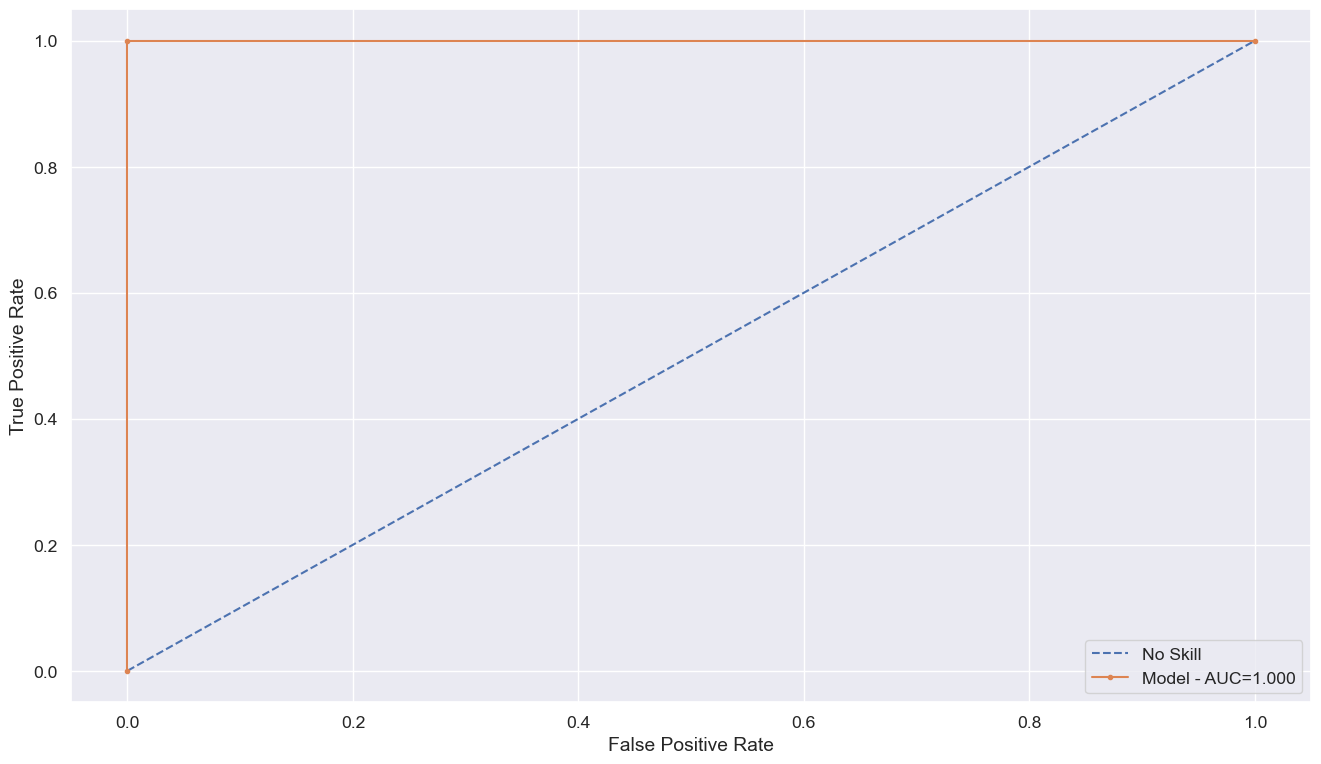

In [548]:
ROC_AUC(y_train, y_train_pred)

### Decision Tree Classification Model on the Testing set

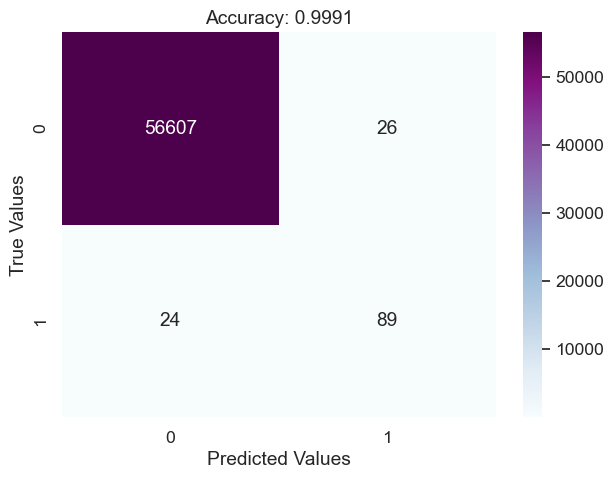



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.77      0.79      0.78       113

    accuracy                           1.00     56746
   macro avg       0.89      0.89      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [549]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [550]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.7876
Precision score: 0.7739
F1-Score: 0.7807
Accuracy score: 0.9991
AUC: 0.8936


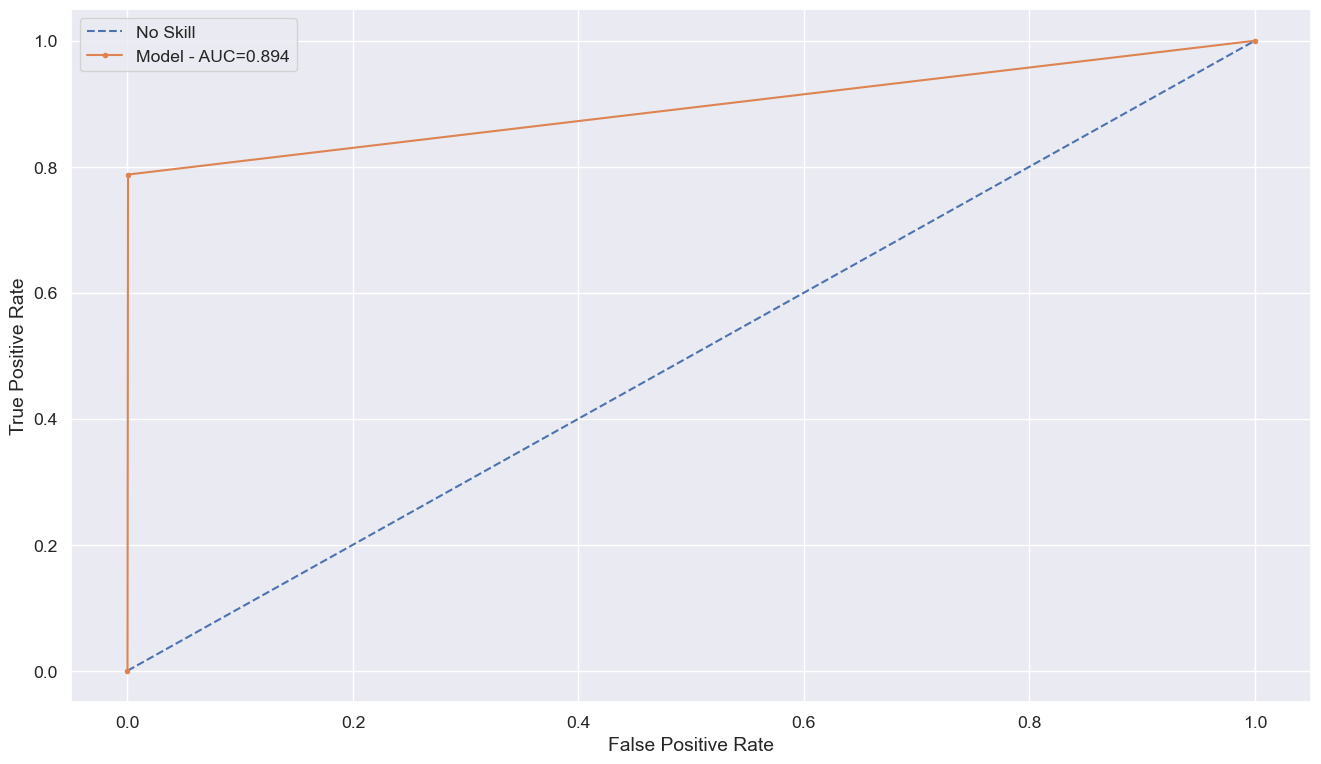

In [551]:
ROC_AUC(y_test, y_test_pred)

# Random Forest

### Random Forest Classification Model on the Training set

In [552]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)
acc5 = accuracy_score(y_test, y_test_pred)

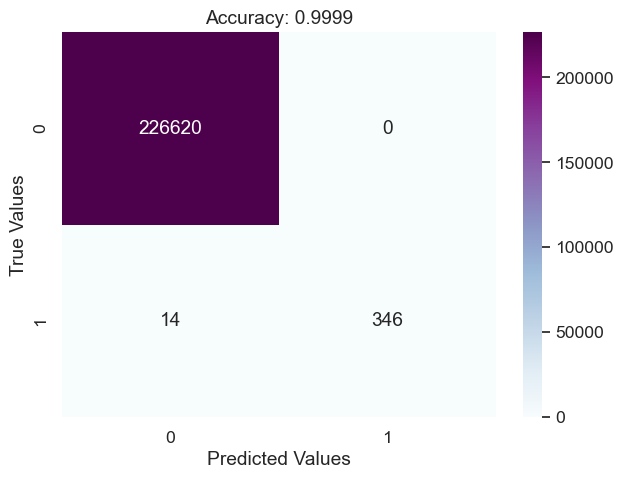



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      0.96      0.98       360

    accuracy                           1.00    226980
   macro avg       1.00      0.98      0.99    226980
weighted avg       1.00      1.00      1.00    226980



In [553]:
# Train Predictions
Visualize_confusion_matrix(y_train, y_train_pred)

In [554]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train, y_train_pred))

Recall score: 0.9611
Precision score: 1.0000
F1-Score: 0.9802
Accuracy score: 0.9999
AUC: 0.9806


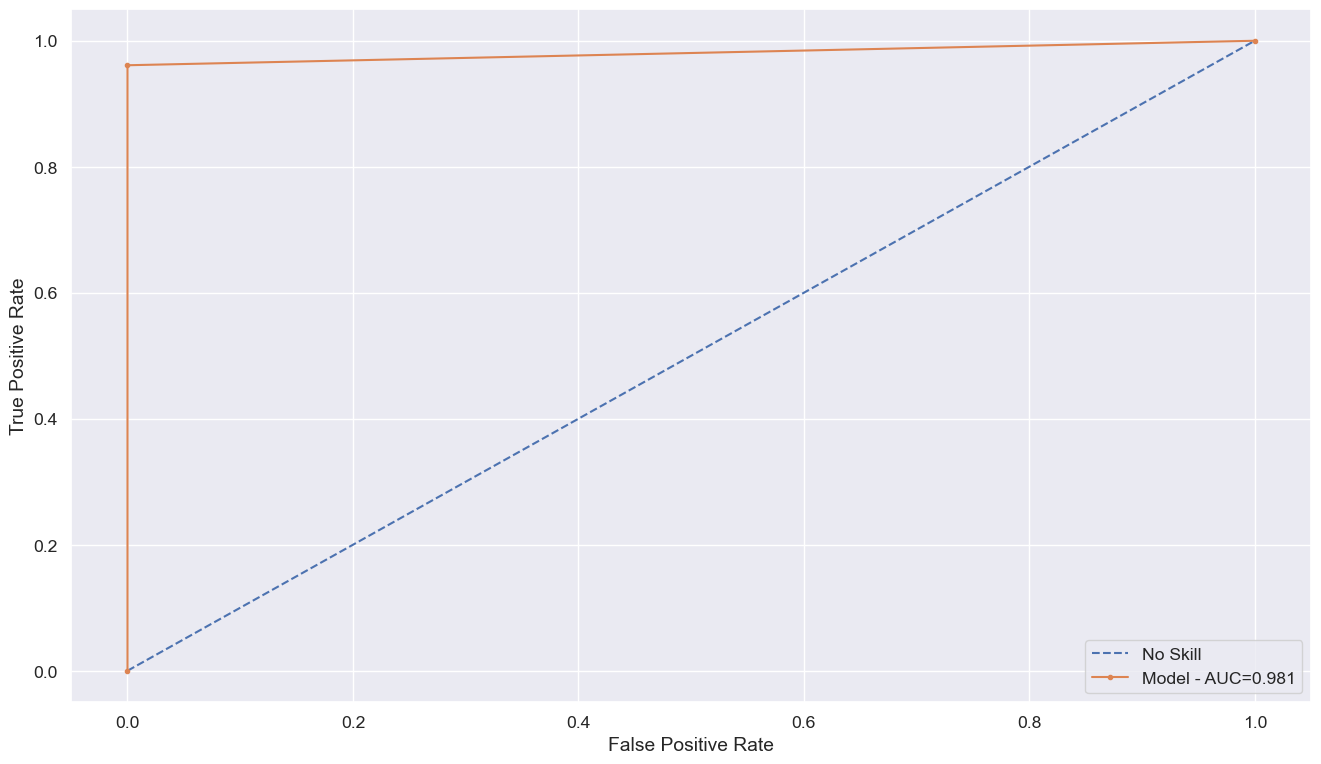

In [555]:
ROC_AUC(y_train, y_train_pred)

### Random Forest Classification Model on the Testing set

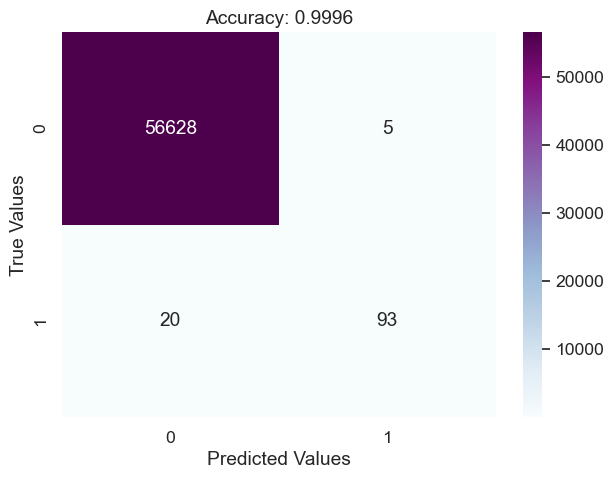



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.95      0.82      0.88       113

    accuracy                           1.00     56746
   macro avg       0.97      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [556]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [557]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8230
Precision score: 0.9490
F1-Score: 0.8815
Accuracy score: 0.9996
AUC: 0.9115


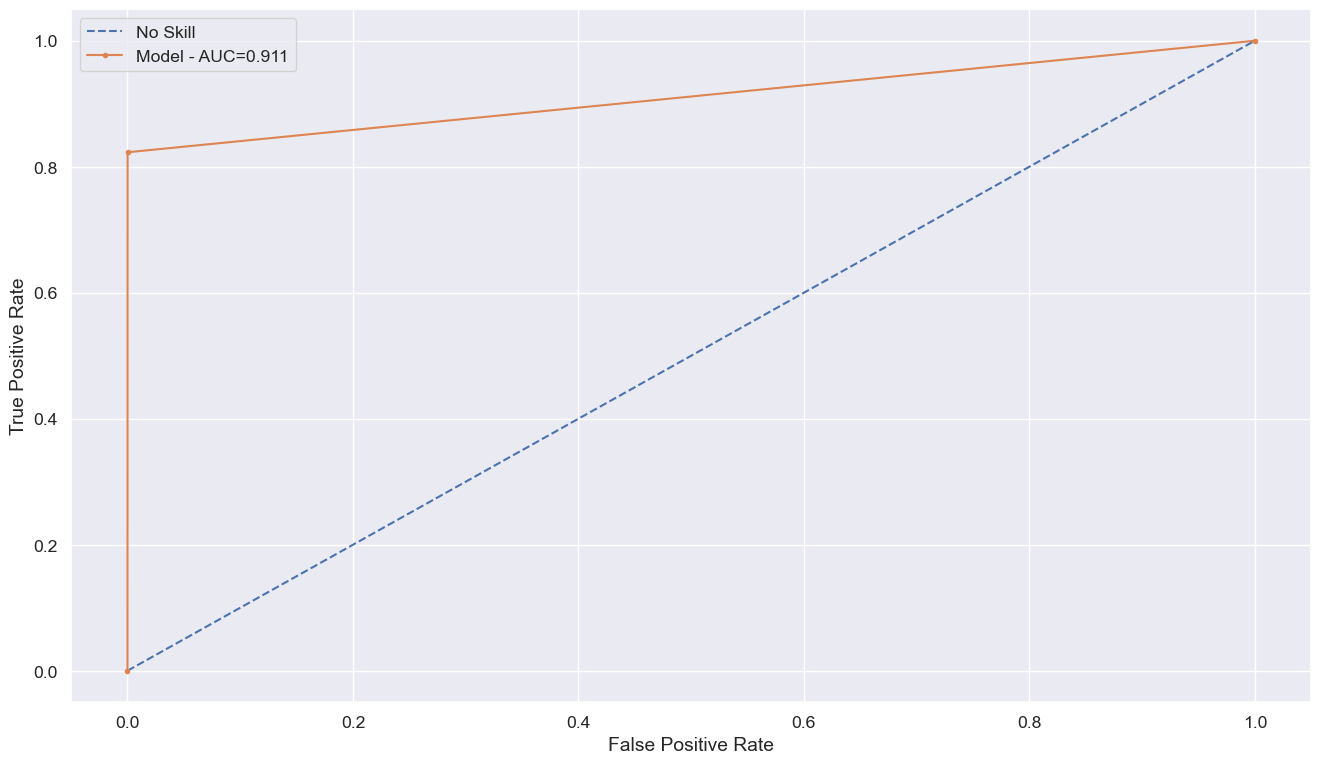

In [558]:
ROC_AUC(y_test, y_test_pred)

# XGBoost

### XGBoost Model on the Training set

In [341]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_train_pred = XGB_model.predict(X_train)
y_test_pred = XGB_model.predict(X_test)
acc7 = accuracy_score(y_test, y_test_pred)

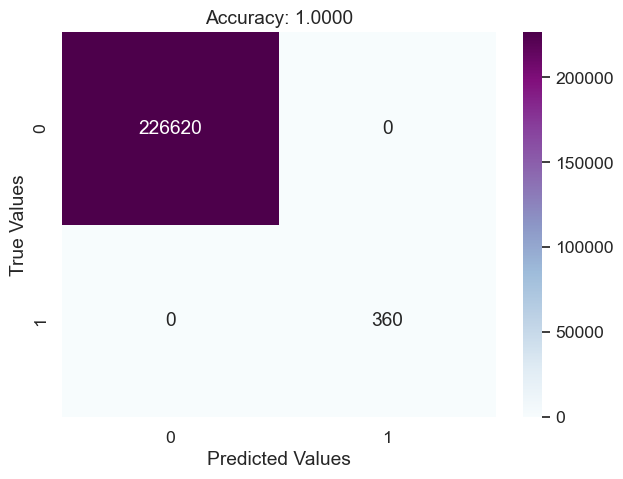



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00       360

    accuracy                           1.00    226980
   macro avg       1.00      1.00      1.00    226980
weighted avg       1.00      1.00      1.00    226980



In [342]:
# Train Predictions
Visualize_confusion_matrix(y_train, y_train_pred)

In [343]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


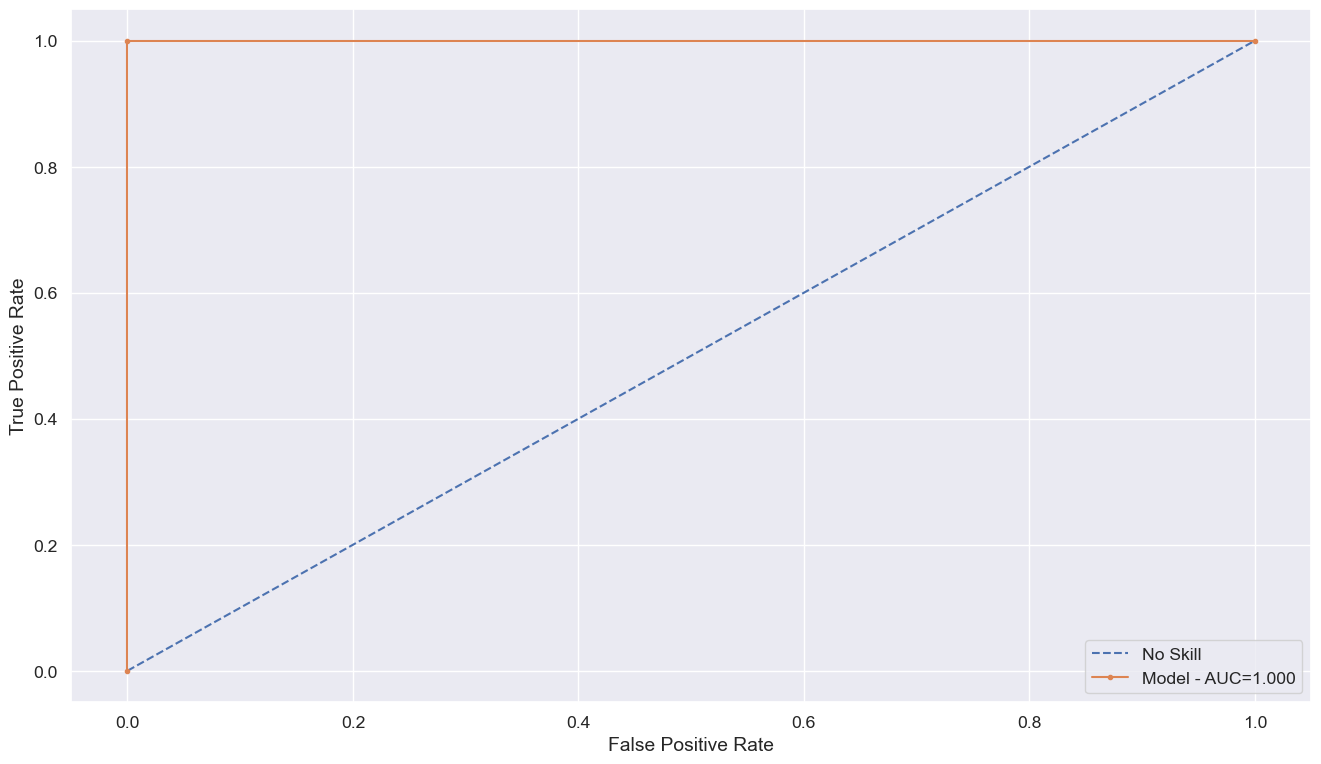

In [344]:
ROC_AUC(y_train, y_train_pred)

### XGBoost Model on the Testing set

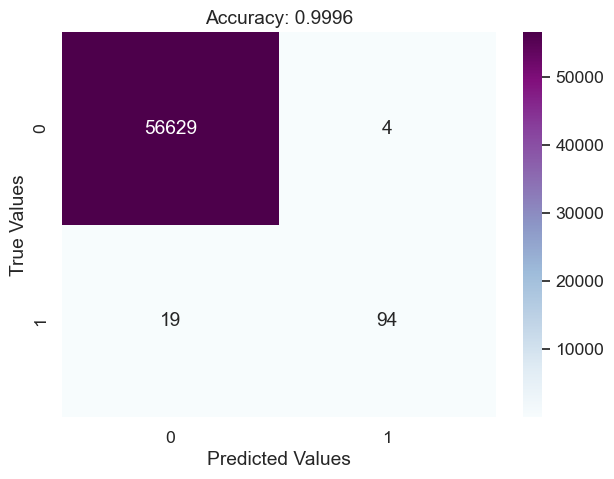



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.96      0.83      0.89       113

    accuracy                           1.00     56746
   macro avg       0.98      0.92      0.95     56746
weighted avg       1.00      1.00      1.00     56746



In [345]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [346]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8319
Precision score: 0.9592
F1-Score: 0.8910
Accuracy score: 0.9996
AUC: 0.9159


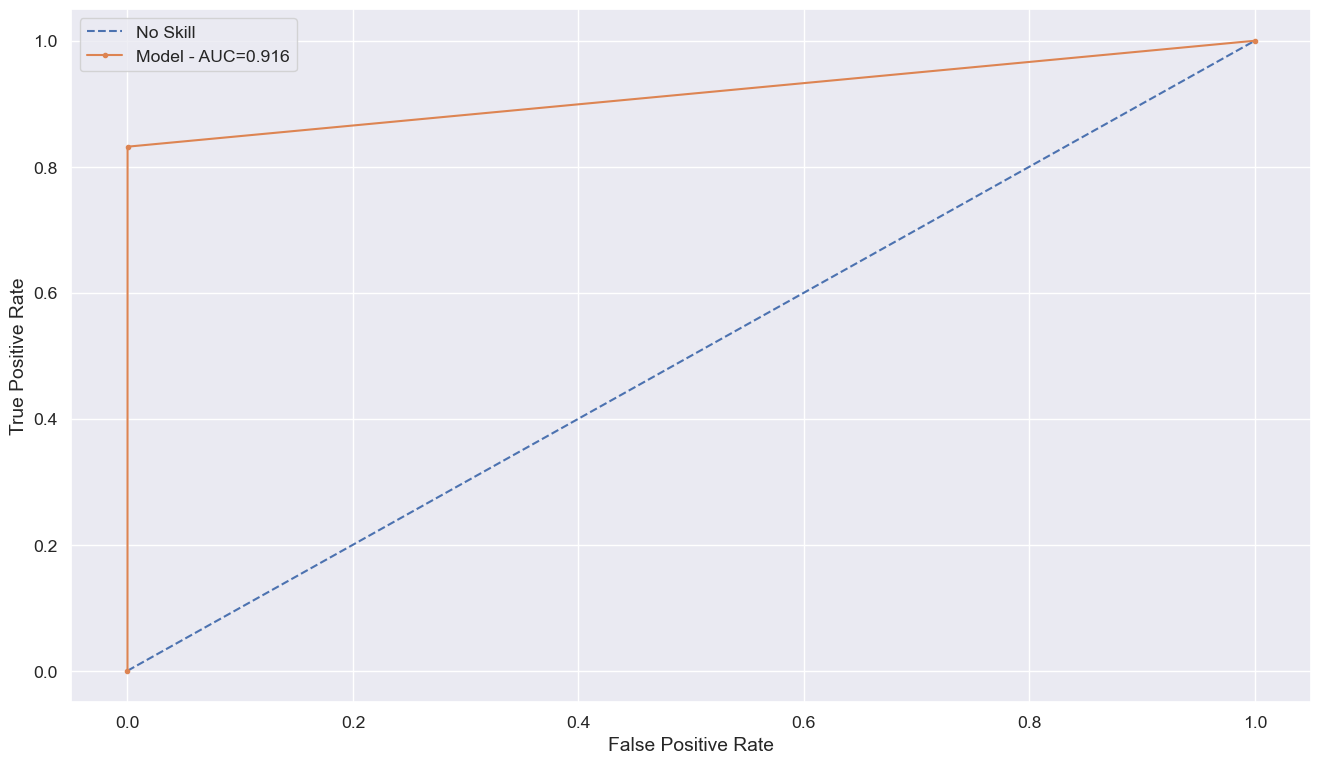

In [347]:
ROC_AUC(y_test, y_test_pred)

# Result

## ROC Curve and Area Under the Curve

In [348]:
from sklearn.metrics import roc_curve, auc

### Logistic Regression

In [349]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

### Decision Tree

In [350]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

### Random Forest

In [351]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

### XGBoost

In [352]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

### Plotting Graph

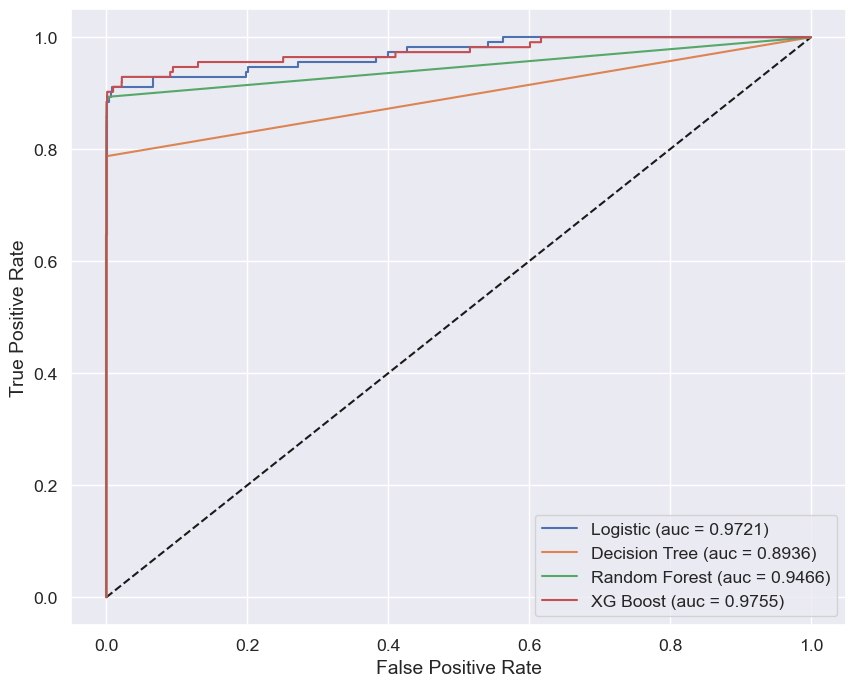

In [353]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.4f)' % auc_logistic)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

*Out of all models Logistic and XG Boost performed best in terms of ROC-AUC scores.*

# Model building on balanced data

*There are two ways:    
    1. Undersampling   
    2. Oversampling*

*Undersampling: In this method we have to balance the class distribution. Therefore, we will reduce the number of non-fraud transactions to 396 which was the number of fraud transactions.*

*Oversampling: In this method we have to balance by keeping the same number of non-fraud transactions as fraud transactions.*

# Model building on balanced data with Undersampling.

In [354]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [355]:
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [356]:
# Before sampling class distribution
print('Before sampling class distribution: ', Counter(y_train))
# New class distribution
print('New class distribution: ', Counter(y_train_rus))

Before sampling class distribution:  Counter({0: 226620, 1: 360})
New class distribution:  Counter({0: 360, 1: 360})


# Logistic Regression

### Logistic Regression Model on the Training set

In [357]:
from sklearn.linear_model import LogisticRegression
LR_model_rus = LogisticRegression(random_state = 0)
LR_model_rus.fit(X_train_rus, y_train_rus)
y_train_pred = LR_model_rus.predict(X_train_rus)
y_test_pred = LR_model_rus.predict(X_test)
acc_rus_1 = accuracy_score(y_test, y_test_pred)

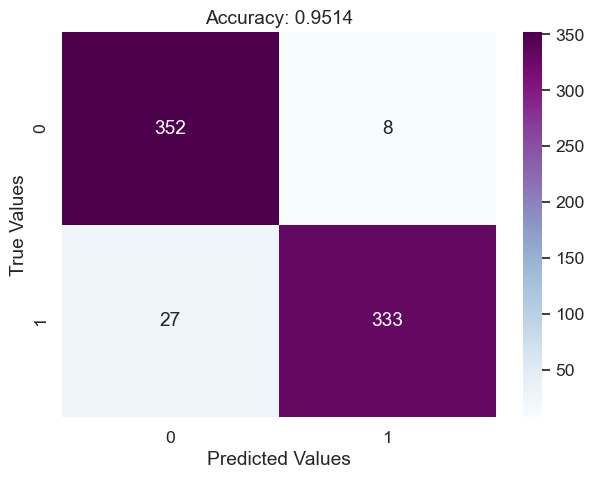



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       360
           1       0.98      0.93      0.95       360

    accuracy                           0.95       720
   macro avg       0.95      0.95      0.95       720
weighted avg       0.95      0.95      0.95       720



In [358]:
# Train Predictions
Visualize_confusion_matrix(y_train_rus, y_train_pred)

In [359]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_rus, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_rus, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_rus, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_rus, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_rus, y_train_pred))

Recall score: 0.9250
Precision score: 0.9765
F1-Score: 0.9501
Accuracy score: 0.9514
AUC: 0.9514


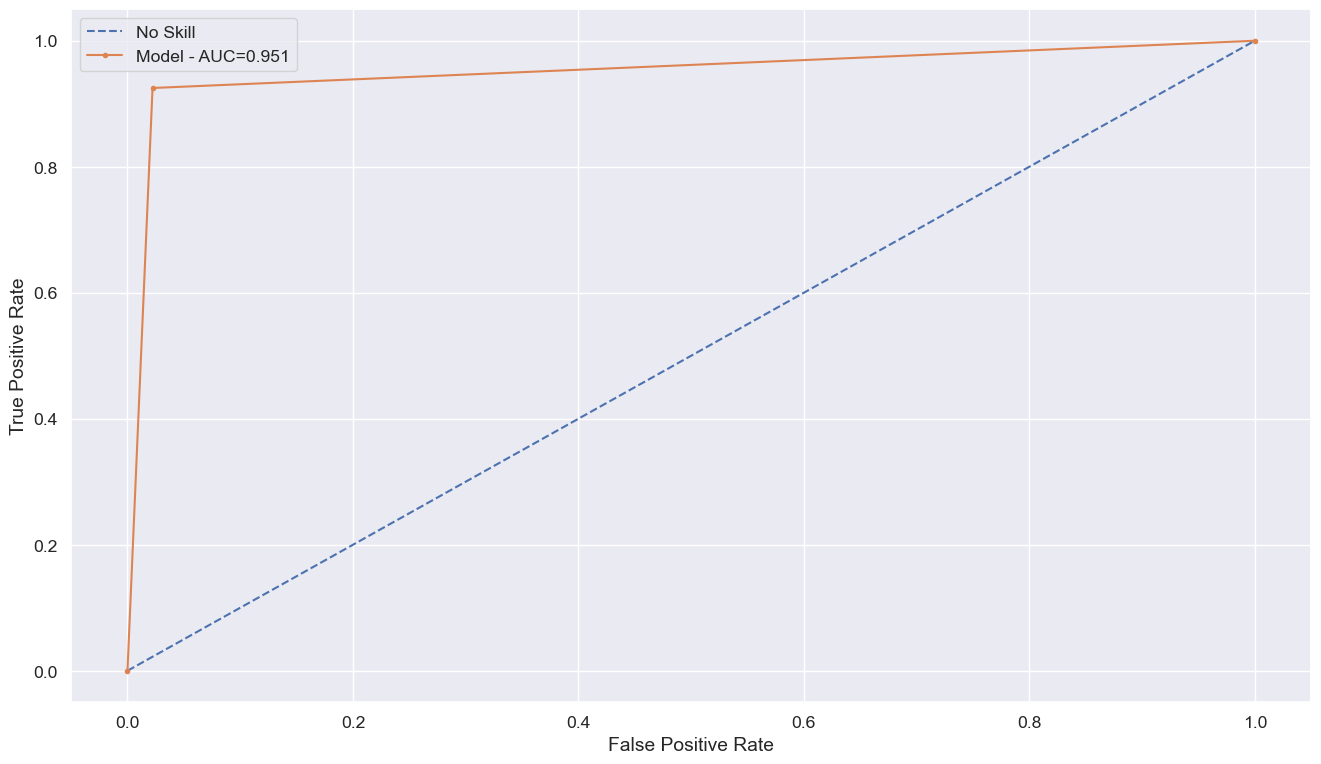

In [360]:
ROC_AUC(y_train_rus, y_train_pred)

### Logistic Regression Model on the Testing set

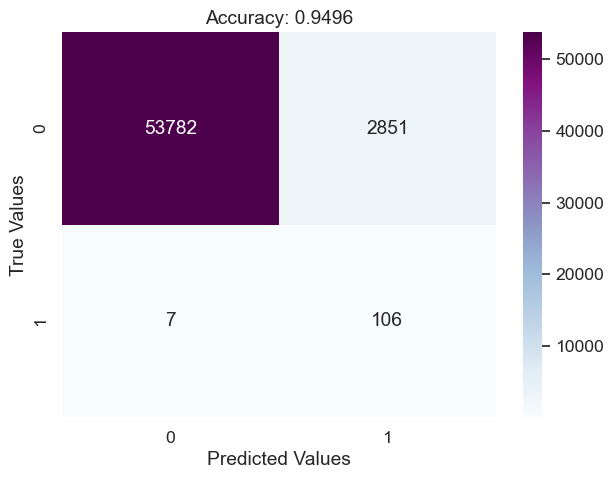



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56633
           1       0.04      0.94      0.07       113

    accuracy                           0.95     56746
   macro avg       0.52      0.94      0.52     56746
weighted avg       1.00      0.95      0.97     56746



In [361]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [362]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.9381
Precision score: 0.0358
F1-Score: 0.0691
Accuracy score: 0.9496
AUC: 0.9439


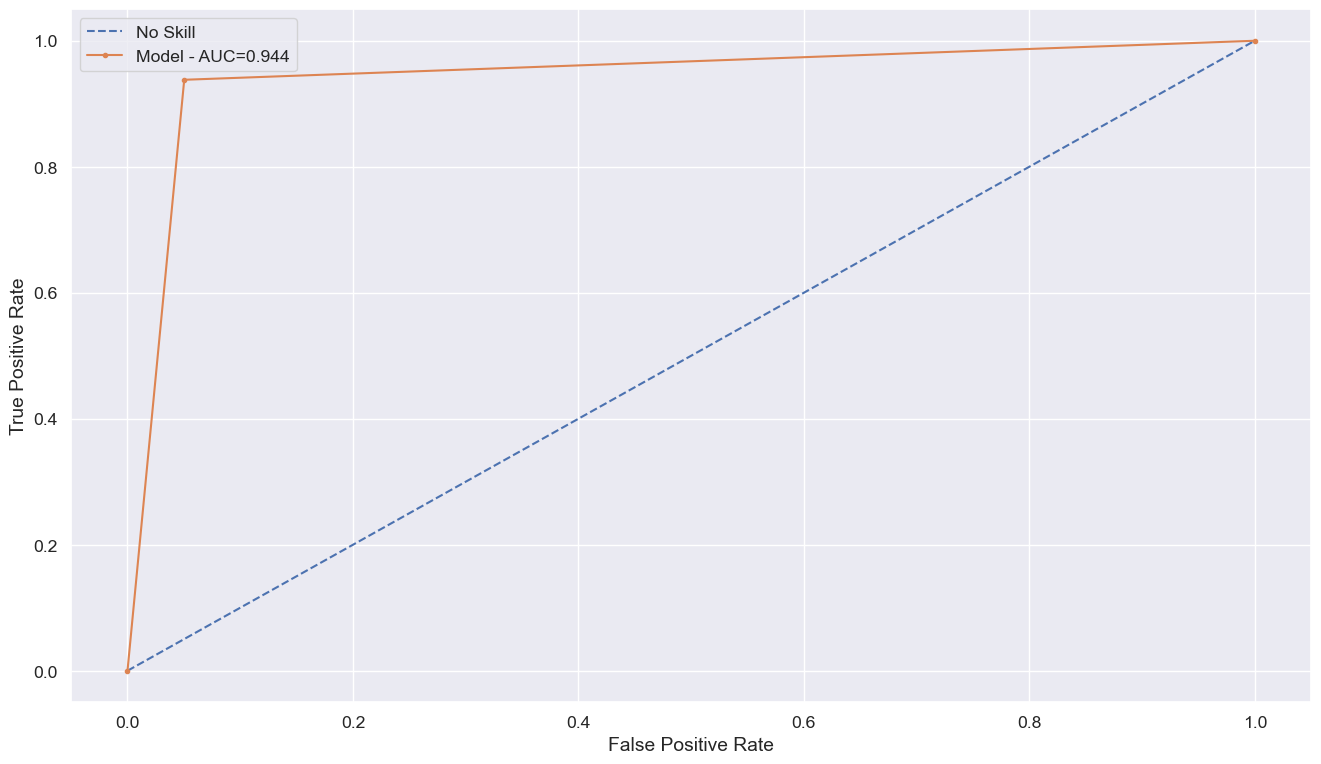

In [363]:
ROC_AUC(y_test, y_test_pred)

# Decision Tree

### Decision Tree Classification Model on Train set

In [364]:
from sklearn.tree import DecisionTreeClassifier
DTR_model_rus = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DTR_model_rus.fit(X_train_rus, y_train_rus)
y_train_pred = DTR_model_rus.predict(X_train_rus)
y_test_pred = DTR_model_rus.predict(X_test)
acc_rus_4 = accuracy_score(y_test, y_test_pred)

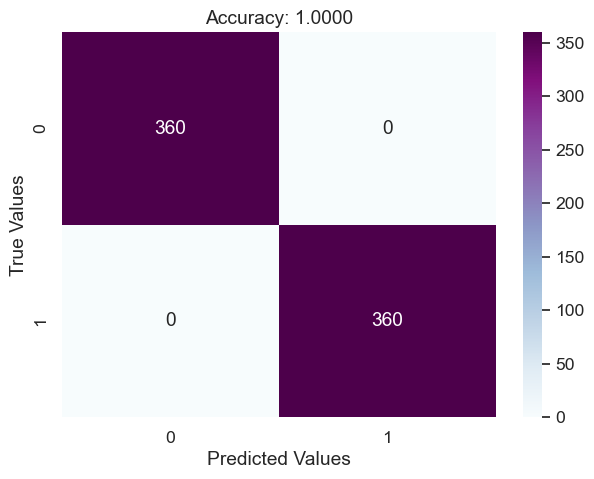



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [365]:
# Train Predictions
Visualize_confusion_matrix(y_train_rus, y_train_pred)

In [366]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_rus, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_rus, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_rus, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_rus, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_rus, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


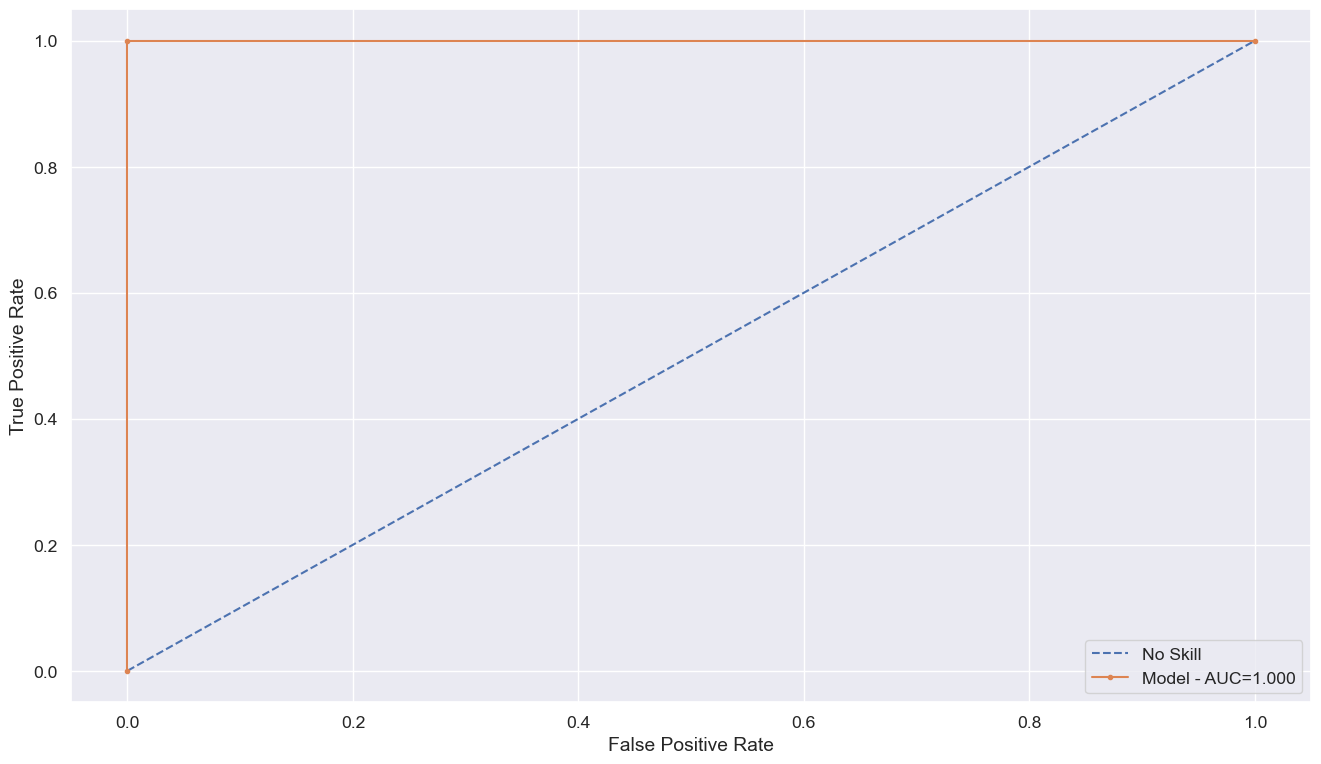

In [367]:
ROC_AUC(y_train_rus, y_train_pred)

### Decision Tree Classification Model on the Testing set

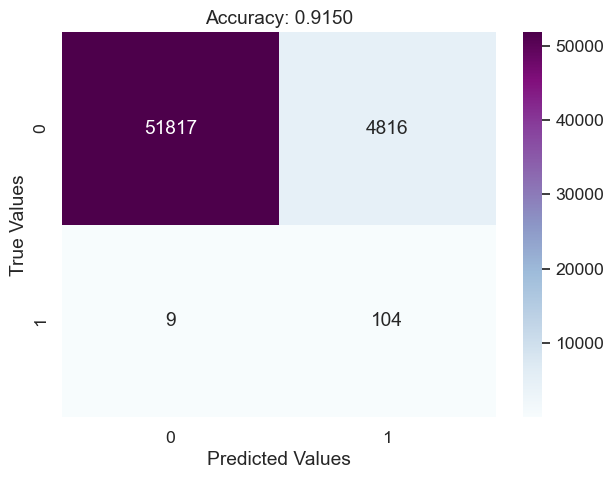



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96     56633
           1       0.02      0.92      0.04       113

    accuracy                           0.91     56746
   macro avg       0.51      0.92      0.50     56746
weighted avg       1.00      0.91      0.95     56746



In [368]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [369]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.9204
Precision score: 0.0211
F1-Score: 0.0413
Accuracy score: 0.9150
AUC: 0.9177


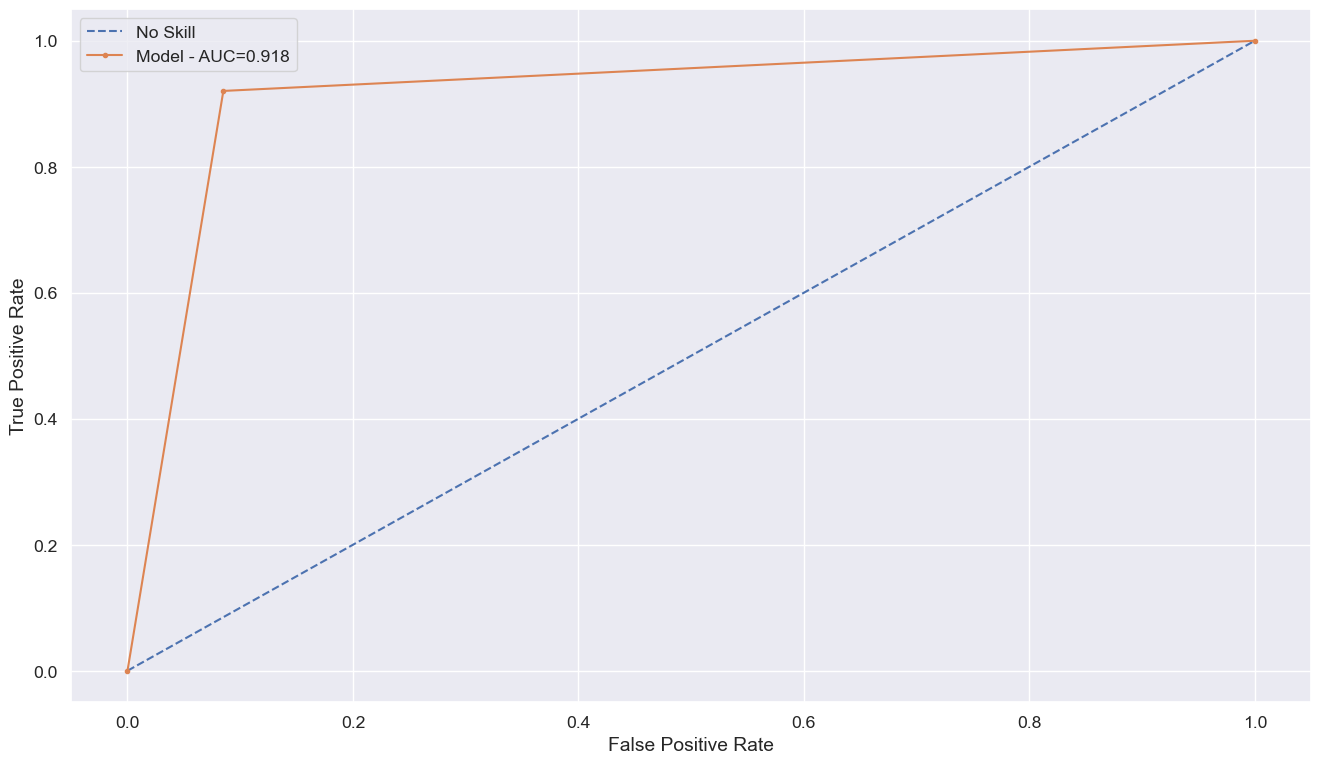

In [370]:
ROC_AUC(y_test, y_test_pred)

# Random Forest

### Random Forest Classification Model on the Training set

In [371]:
from sklearn.ensemble import RandomForestClassifier
RF_model_rus = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RF_model_rus.fit(X_train_rus, y_train_rus)
y_train_pred = RF_model_rus.predict(X_train_rus)
y_test_pred = RF_model_rus.predict(X_test)
acc_rus_5 = accuracy_score(y_test, y_test_pred)

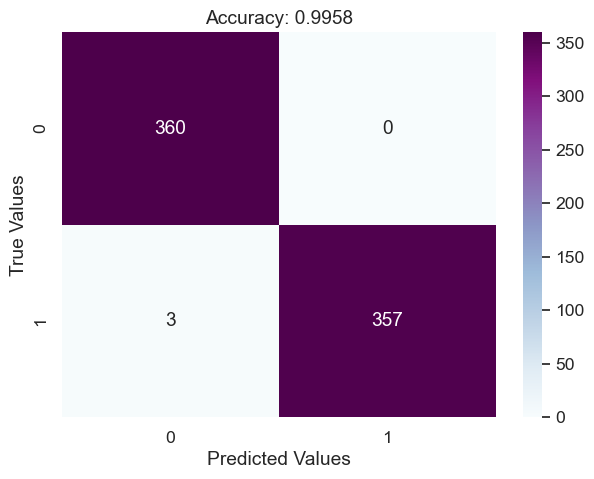



Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       360
           1       1.00      0.99      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [372]:
# Train Predictions
Visualize_confusion_matrix(y_train_rus, y_train_pred)

In [373]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_rus, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_rus, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_rus, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_rus, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_rus, y_train_pred))

Recall score: 0.9917
Precision score: 1.0000
F1-Score: 0.9958
Accuracy score: 0.9958
AUC: 0.9958


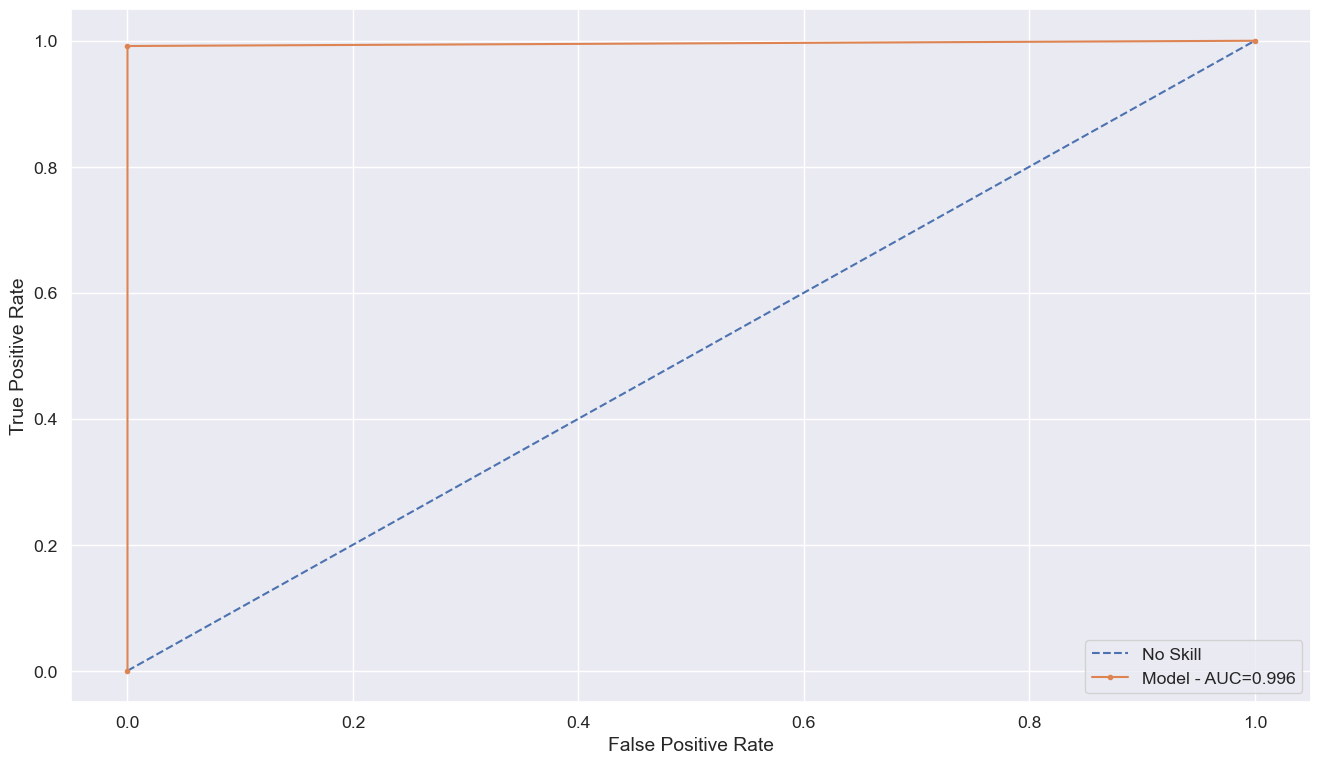

In [374]:
ROC_AUC(y_train_rus, y_train_pred)

### Random Forest Classification Model on the Testing set

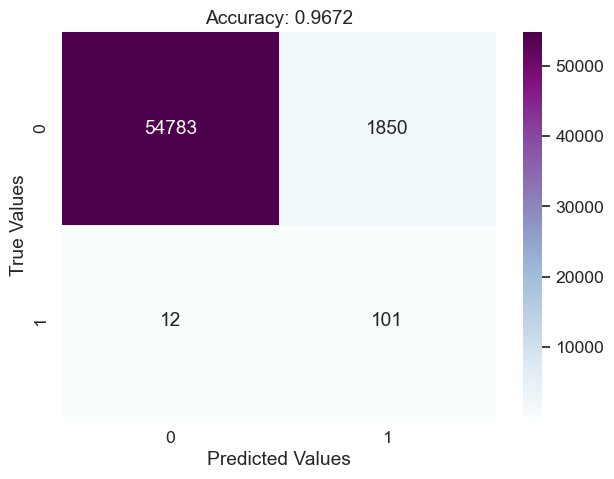



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56633
           1       0.05      0.89      0.10       113

    accuracy                           0.97     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [375]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [376]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8938
Precision score: 0.0518
F1-Score: 0.0979
Accuracy score: 0.9672
AUC: 0.9306


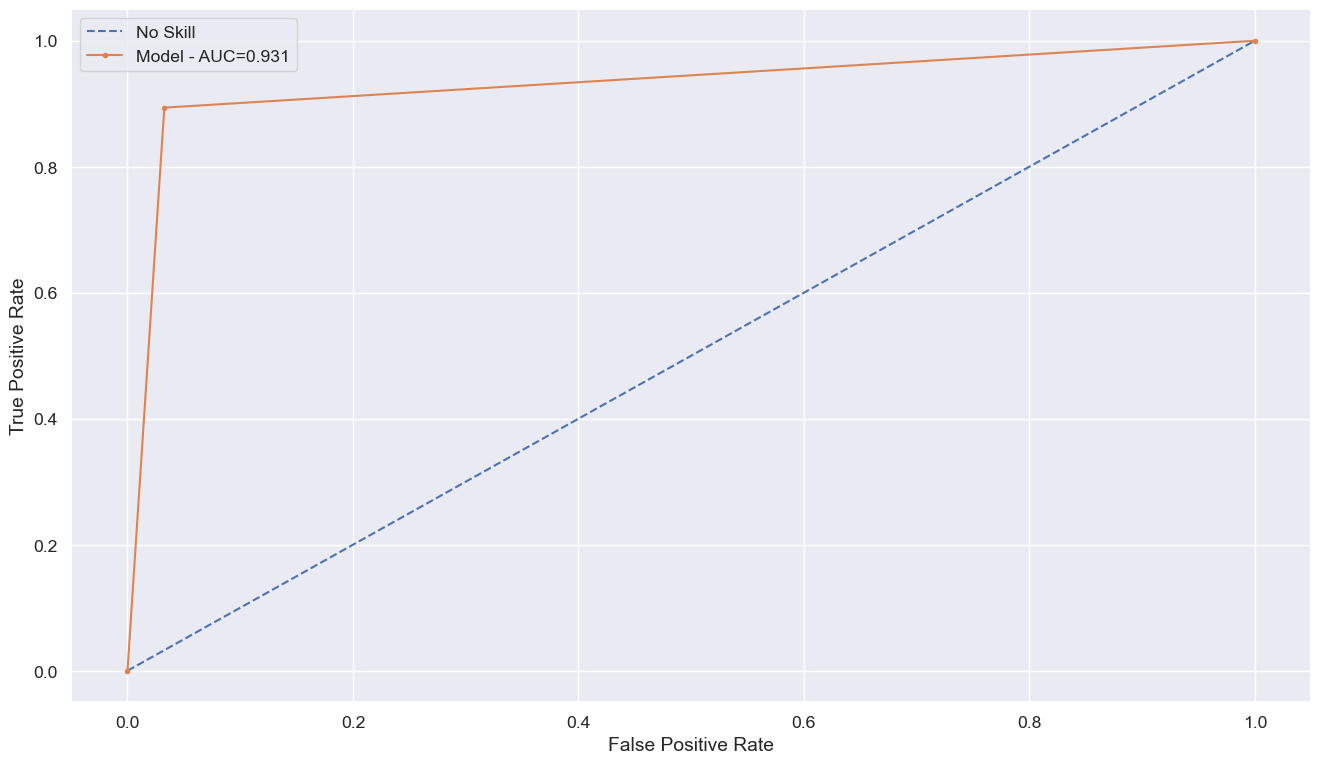

In [377]:
ROC_AUC(y_test, y_test_pred)

# XGBoost

### XGBoost Model on the Training set

In [378]:
from xgboost import XGBClassifier
XGB_model_rus = XGBClassifier()
XGB_model_rus.fit(X_train_rus, y_train_rus)
y_train_pred = XGB_model_rus.predict(X_train_rus)
y_test_pred = XGB_model_rus.predict(X_test)
acc_rus_7 = accuracy_score(y_test, y_test_pred)

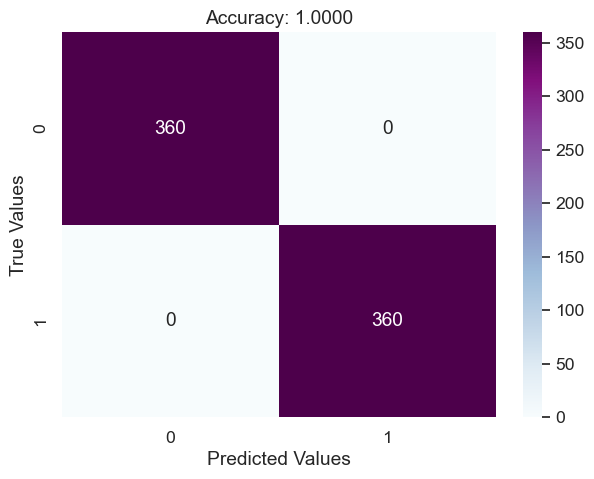



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [379]:
# Train Predictions
Visualize_confusion_matrix(y_train_rus, y_train_pred)

In [380]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_rus, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_rus, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_rus, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_rus, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_rus, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


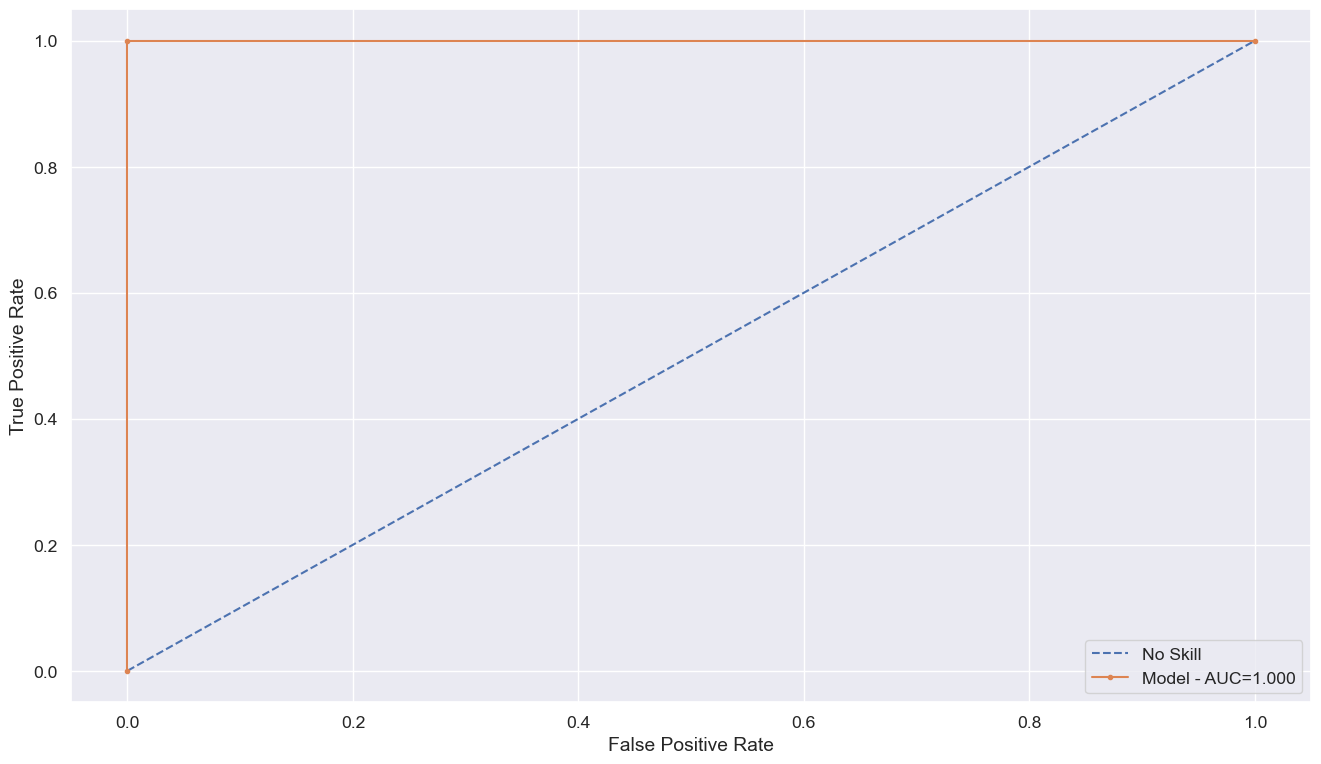

In [381]:
ROC_AUC(y_train_rus, y_train_pred)

### XGBoost Model on the Testing set

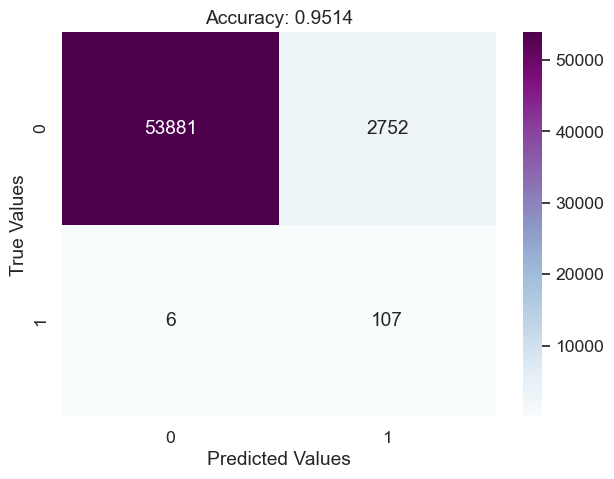



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56633
           1       0.04      0.95      0.07       113

    accuracy                           0.95     56746
   macro avg       0.52      0.95      0.52     56746
weighted avg       1.00      0.95      0.97     56746



In [382]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [383]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.9469
Precision score: 0.0374
F1-Score: 0.0720
Accuracy score: 0.9514
AUC: 0.9492


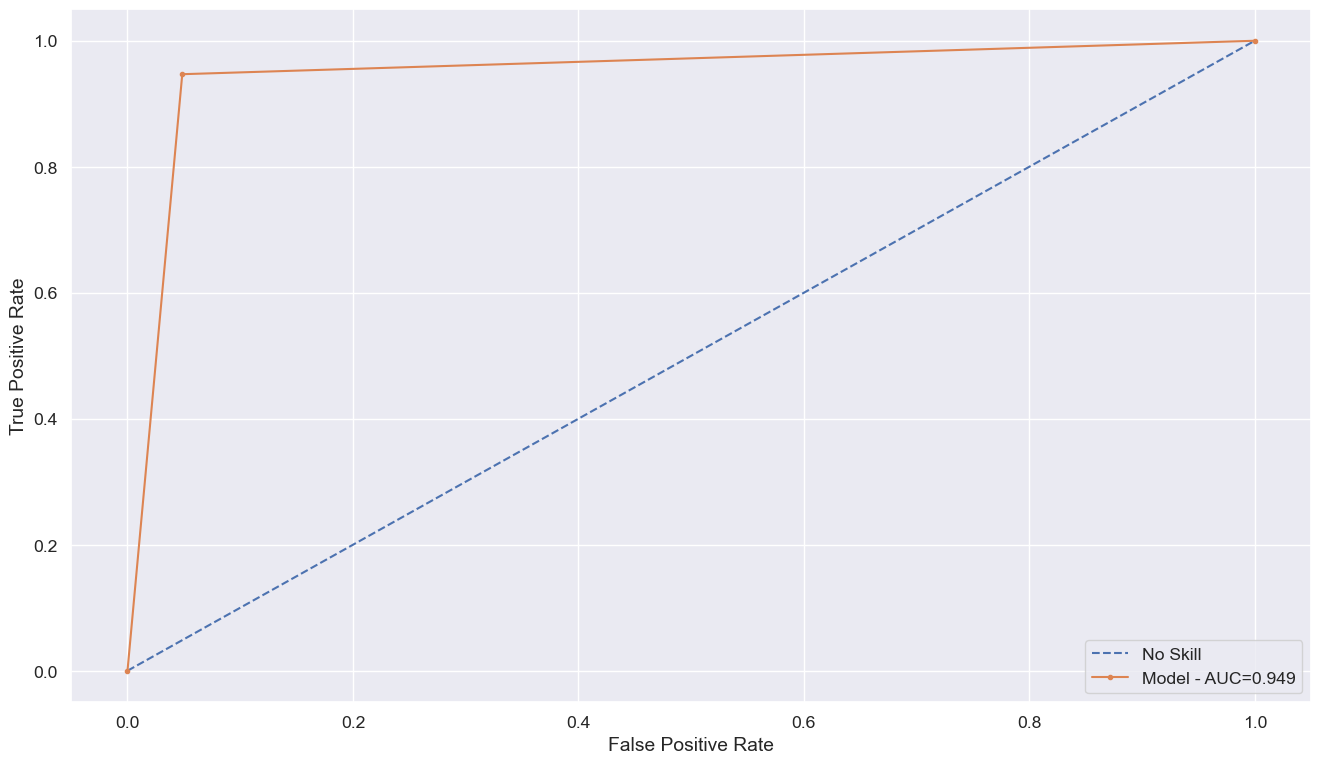

In [384]:
ROC_AUC(y_test, y_test_pred)

# Result

## ROC Curve and Area Under the Curve

In [385]:
from sklearn.metrics import roc_curve, auc

### Logistic Regression

In [386]:
y_pred_logistic = LR_model_rus.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

### Decision Tree

In [387]:
y_pred_dtr = DTR_model_rus.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

### Random Forest

In [388]:
y_pred_rfc = RF_model_rus.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

### XGBoost

In [389]:
y_pred_xgb = XGB_model_rus.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

## Plotting Graph

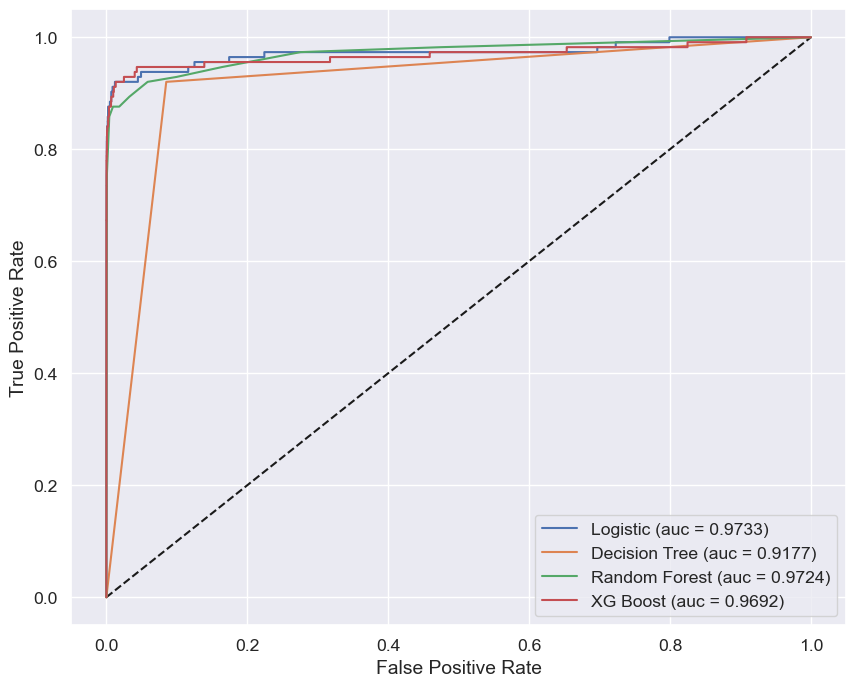

In [390]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.4f)' % auc_logistic)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

# Model building on balanced data with Undersampling.

In [391]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [392]:
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [393]:
# Befor sampling class distribution
print('Before sampling class distribution:', Counter(y_train))
# new class distribution
print('New class distribution:', Counter(y_train_ros))

Before sampling class distribution: Counter({0: 226620, 1: 360})
New class distribution: Counter({0: 226620, 1: 226620})


# Logistic Regression

### Logistic Regression Model on the Training set

In [394]:
from sklearn.linear_model import LogisticRegression
LR_model_ros = LogisticRegression(random_state = 0)
LR_model_ros.fit(X_train_ros, y_train_ros)
y_train_pred = LR_model_ros.predict(X_train_ros)
y_test_pred = LR_model_ros.predict(X_test)
acc_ros_1 = accuracy_score(y_test, y_test_pred)

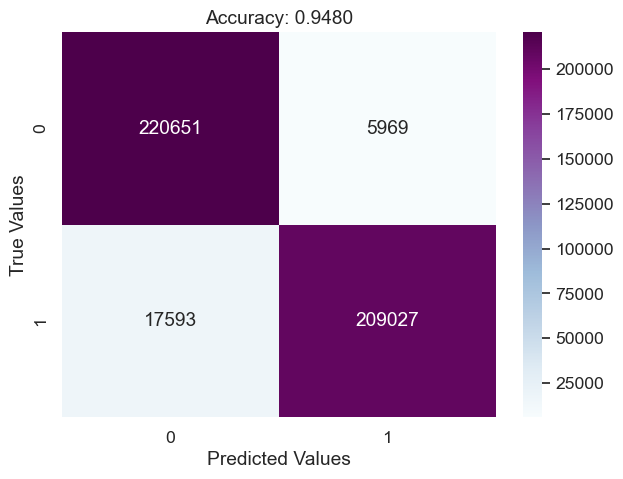



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    226620
           1       0.97      0.92      0.95    226620

    accuracy                           0.95    453240
   macro avg       0.95      0.95      0.95    453240
weighted avg       0.95      0.95      0.95    453240



In [395]:
# Train Predictions
Visualize_confusion_matrix(y_train_ros, y_train_pred)

In [396]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_ros, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_ros, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_ros, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_ros, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_ros, y_train_pred))

Recall score: 0.9224
Precision score: 0.9722
F1-Score: 0.9466
Accuracy score: 0.9480
AUC: 0.9480


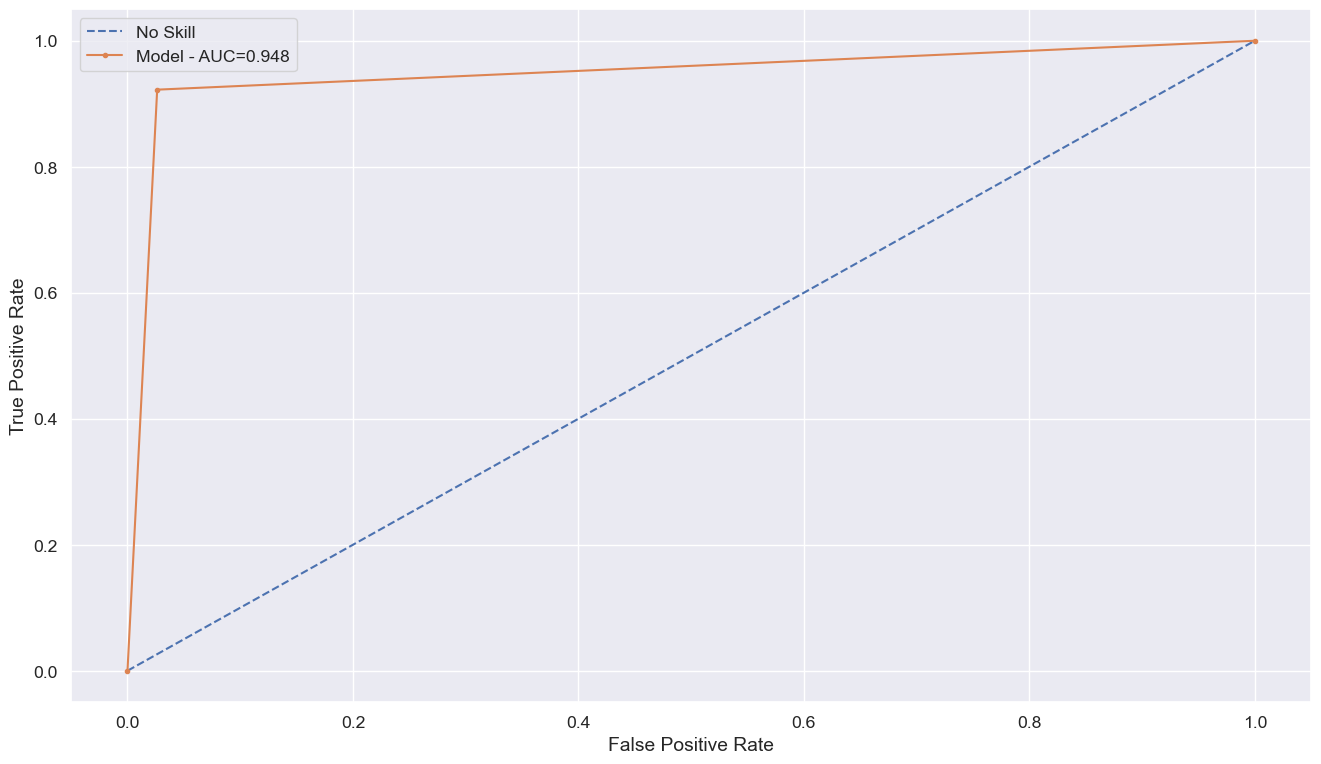

In [397]:
ROC_AUC(y_train_ros, y_train_pred)

### Logistic Regression Model on the Testing set

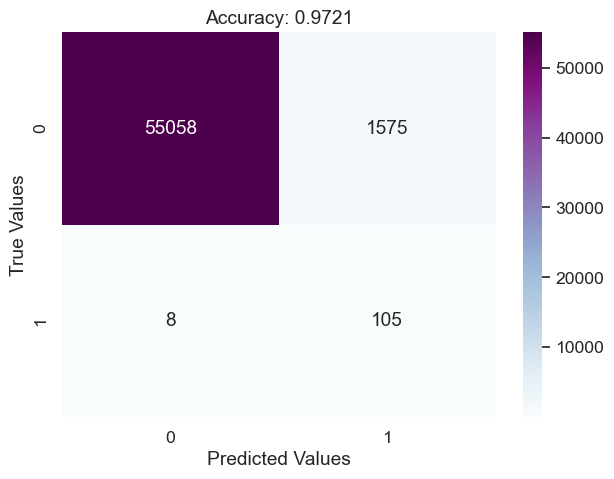



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56633
           1       0.06      0.93      0.12       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746



In [398]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [399]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.9292
Precision score: 0.0625
F1-Score: 0.1171
Accuracy score: 0.9721
AUC: 0.9507


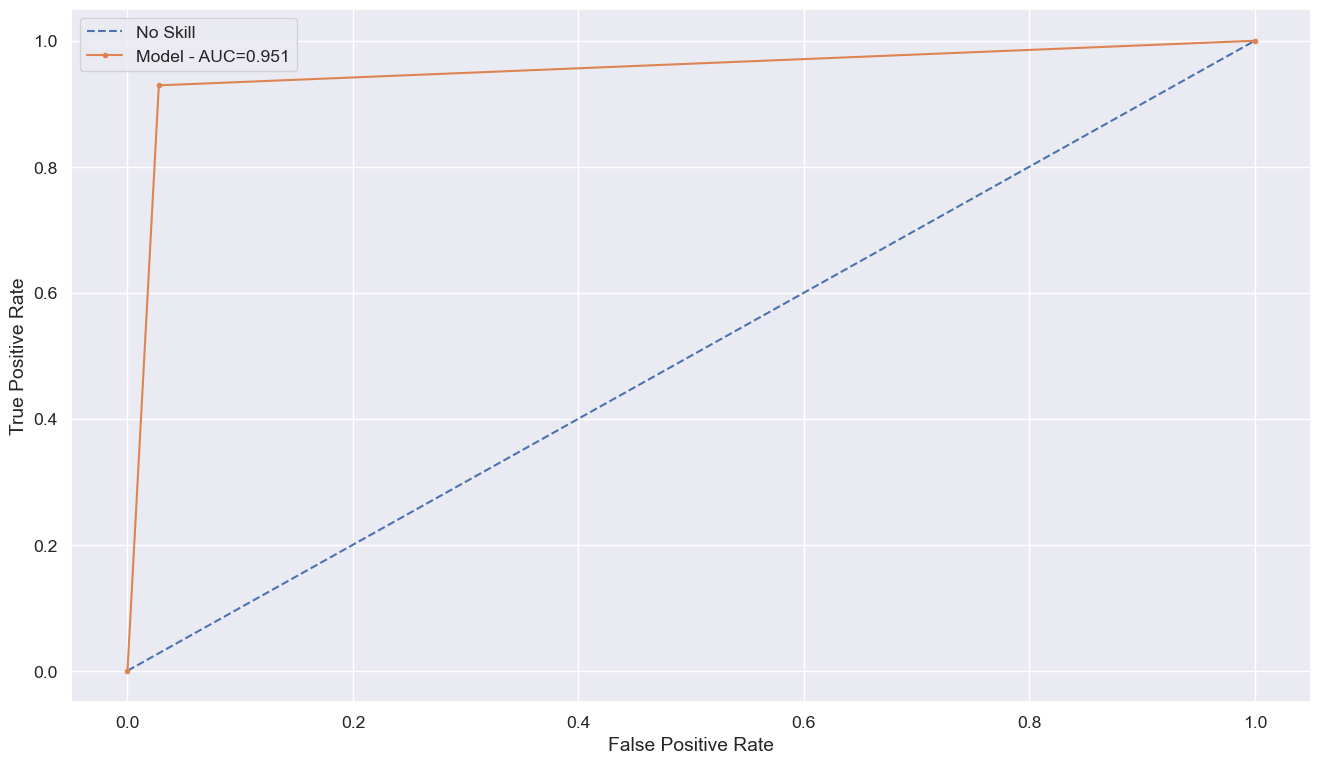

In [400]:
ROC_AUC(y_test, y_test_pred)

# Decision Tree

### Decision Tree Classification Model on Train set

In [401]:
from sklearn.tree import DecisionTreeClassifier
DTR_model_ros = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DTR_model_ros.fit(X_train_ros, y_train_ros)
y_train_pred = DTR_model_ros.predict(X_train_ros)
y_test_pred = DTR_model_ros.predict(X_test)
acc_ros_4 = accuracy_score(y_test, y_test_pred)

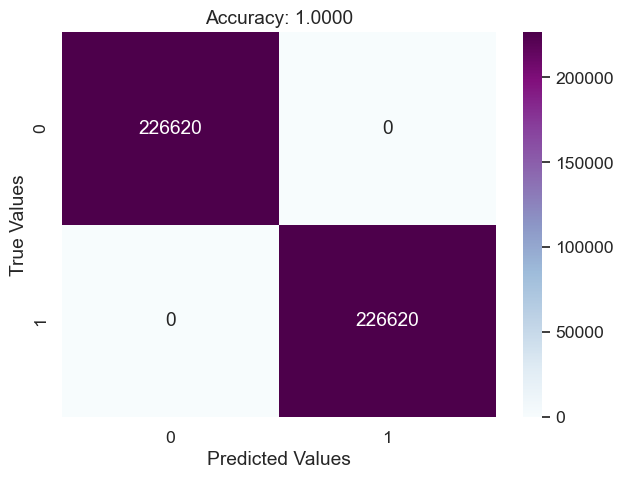



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226620

    accuracy                           1.00    453240
   macro avg       1.00      1.00      1.00    453240
weighted avg       1.00      1.00      1.00    453240



In [402]:
# Train Predictions
Visualize_confusion_matrix(y_train_ros, y_train_pred)

In [403]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_ros, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_ros, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_ros, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_ros, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_ros, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


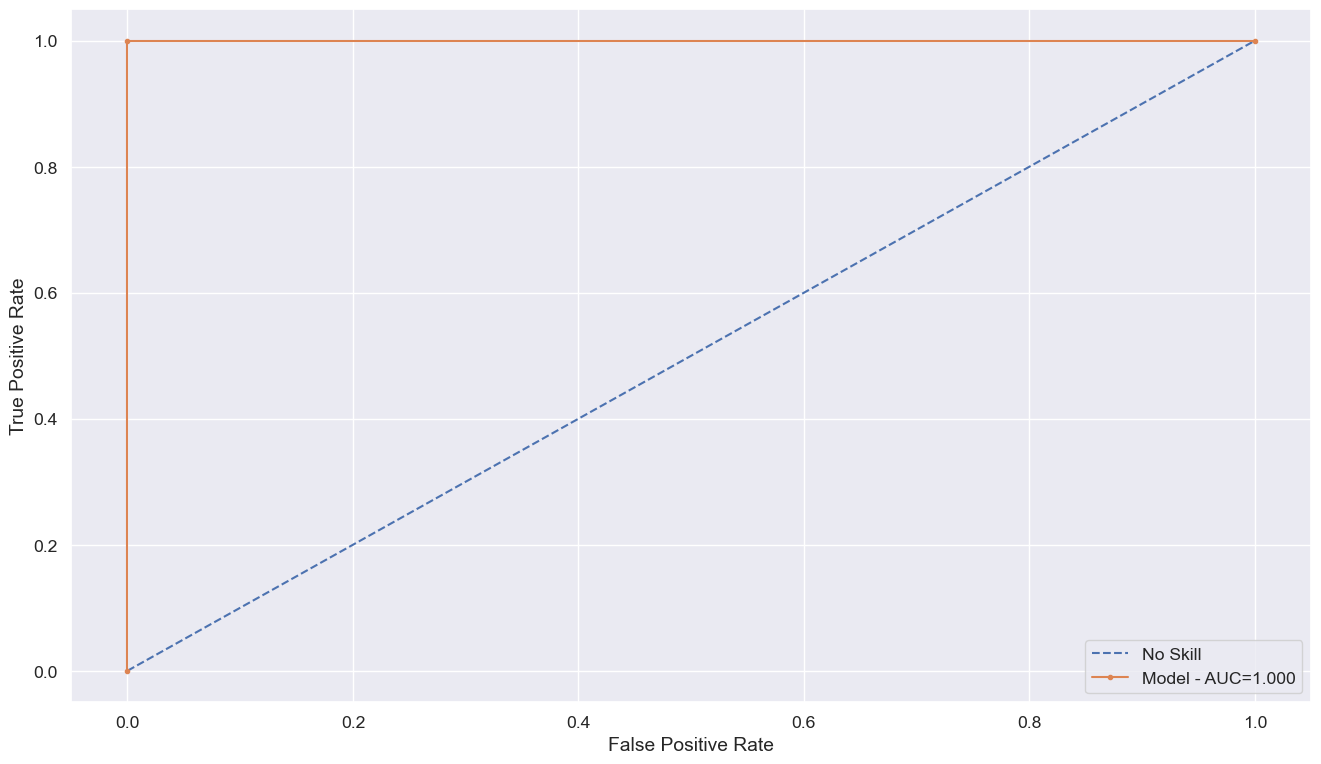

In [404]:
ROC_AUC(y_train_ros, y_train_pred)

### Decision Tree Classification Model on the Testing set

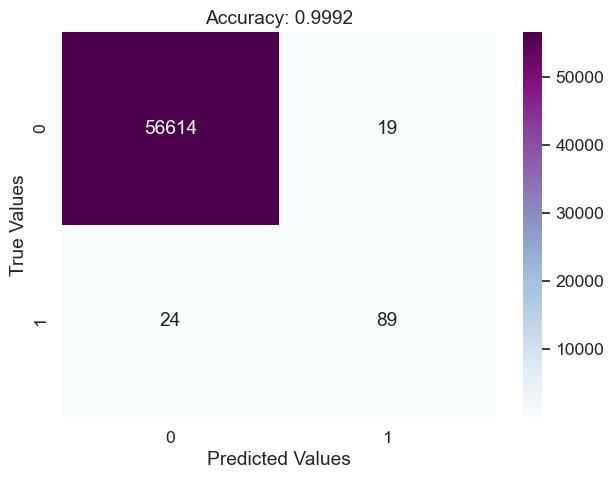



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.82      0.79      0.81       113

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [405]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [406]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.7876
Precision score: 0.8241
F1-Score: 0.8054
Accuracy score: 0.9992
AUC: 0.8936


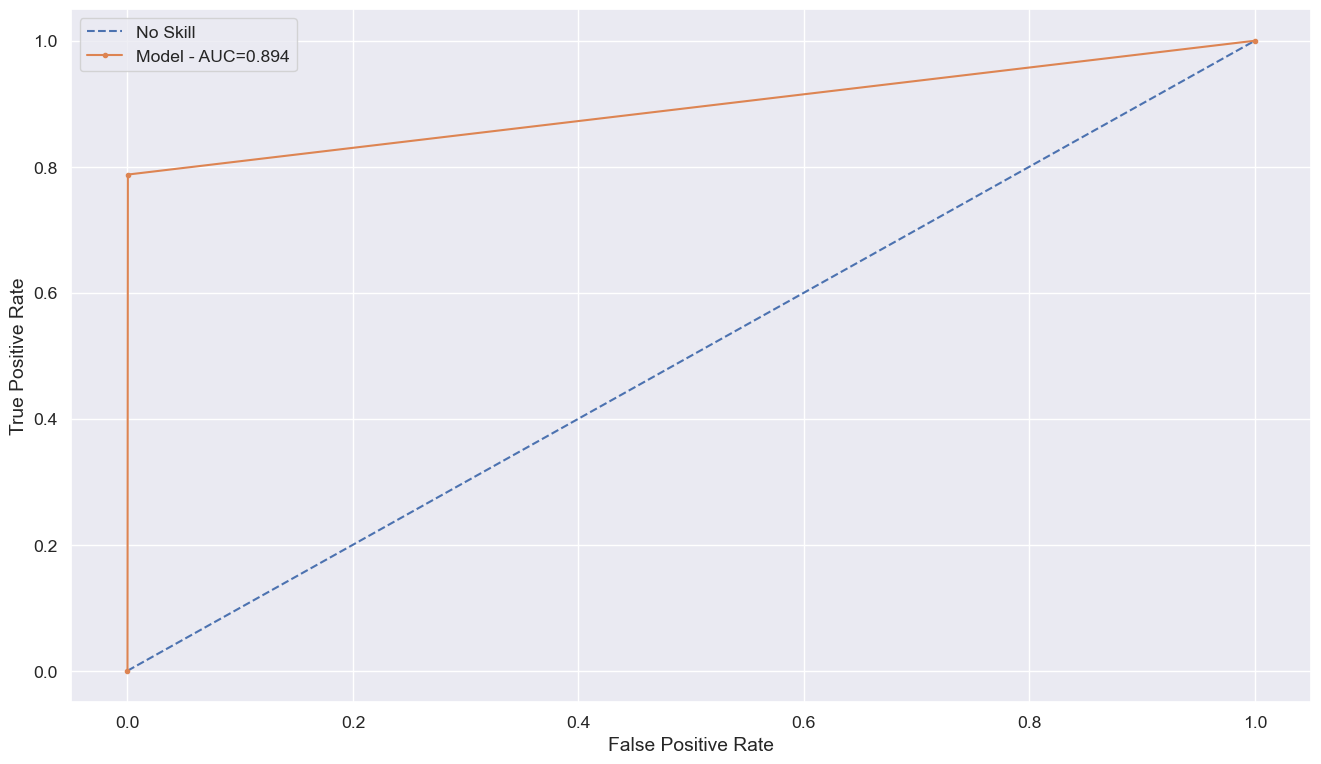

In [407]:
ROC_AUC(y_test, y_test_pred)

# Random Forest

### Random Forest Classification Model on the Training set

In [408]:
from sklearn.ensemble import RandomForestClassifier
RF_model_ros = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model_ros.fit(X_train_ros, y_train_ros)
y_train_pred = RF_model_ros.predict(X_train_ros)
y_test_pred = RF_model_ros.predict(X_test)
acc_ros_5 = accuracy_score(y_test, y_test_pred)

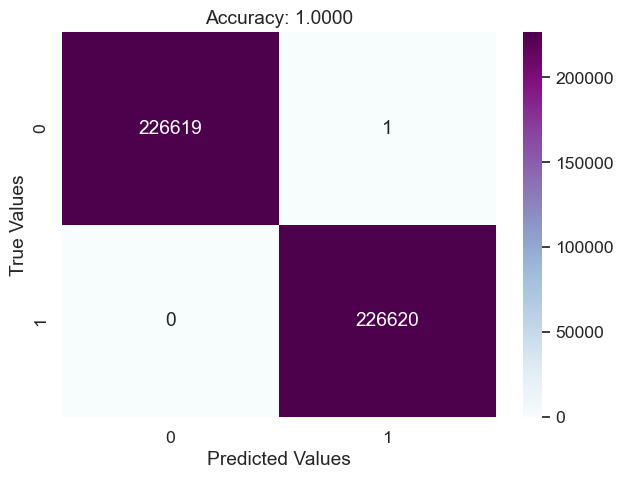



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226620

    accuracy                           1.00    453240
   macro avg       1.00      1.00      1.00    453240
weighted avg       1.00      1.00      1.00    453240



In [409]:
# Train Predictions
Visualize_confusion_matrix(y_train_ros, y_train_pred)

In [410]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_ros, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_ros, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_ros, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_ros, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_ros, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


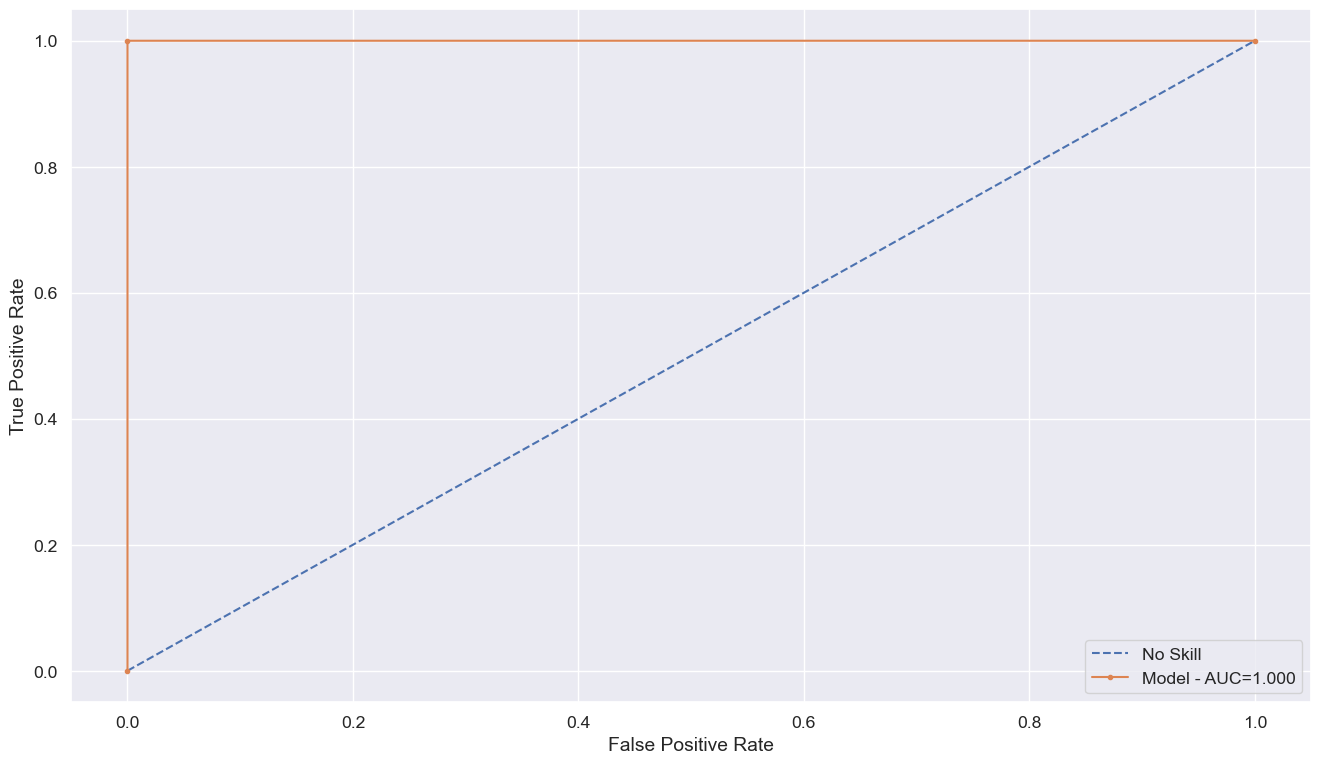

In [411]:
ROC_AUC(y_train_ros, y_train_pred)

### Random Forest Classification Model on the Testing set

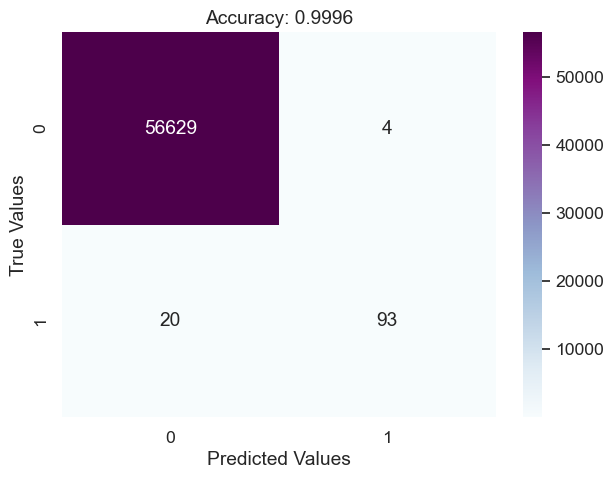



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.96      0.82      0.89       113

    accuracy                           1.00     56746
   macro avg       0.98      0.91      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [412]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [413]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8230
Precision score: 0.9588
F1-Score: 0.8857
Accuracy score: 0.9996
AUC: 0.9115


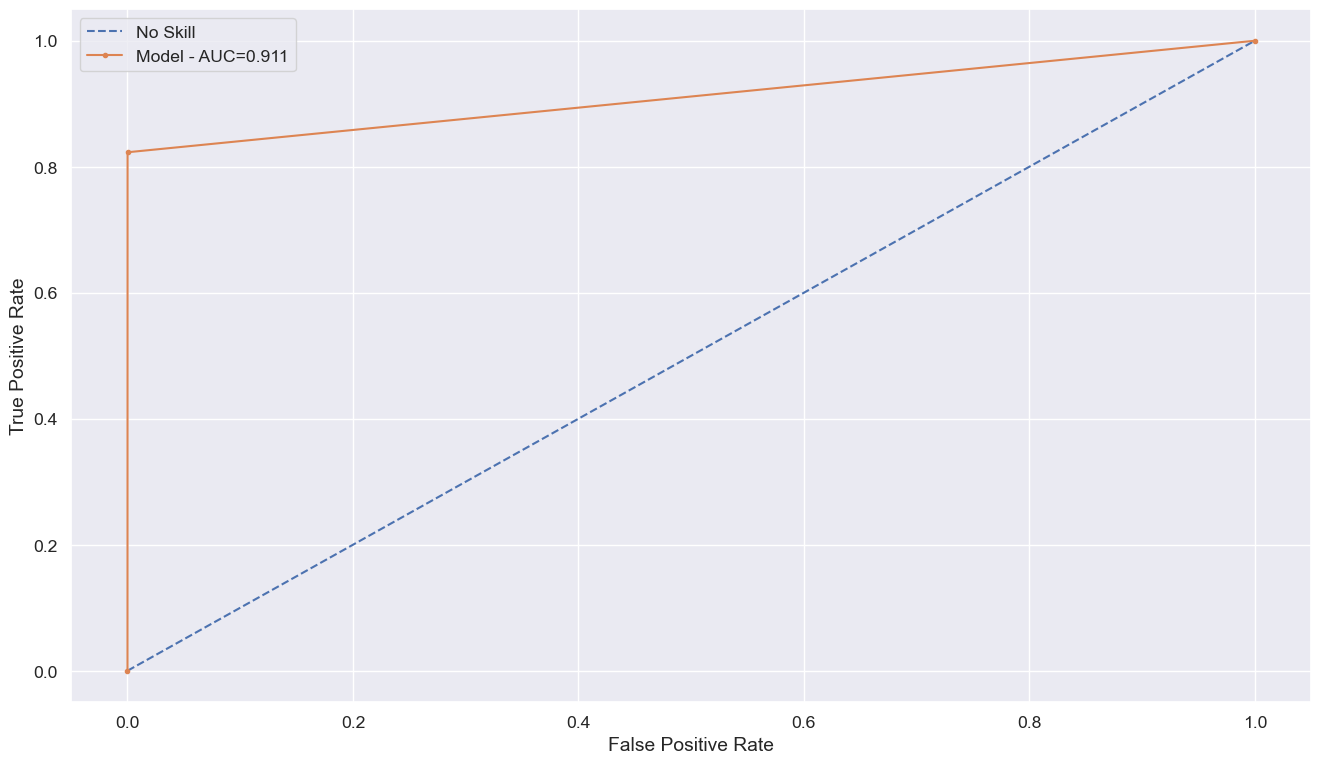

In [414]:
ROC_AUC(y_test, y_test_pred)

# XGBoost

### XGBoost Model on the Training set

In [415]:
from xgboost import XGBClassifier
XGB_model_ros = XGBClassifier()
XGB_model_ros.fit(X_train_ros, y_train_ros)
y_train_pred = XGB_model_ros.predict(X_train_ros)
y_test_pred = XGB_model_ros.predict(X_test)
acc_ros_7 = accuracy_score(y_test, y_test_pred)

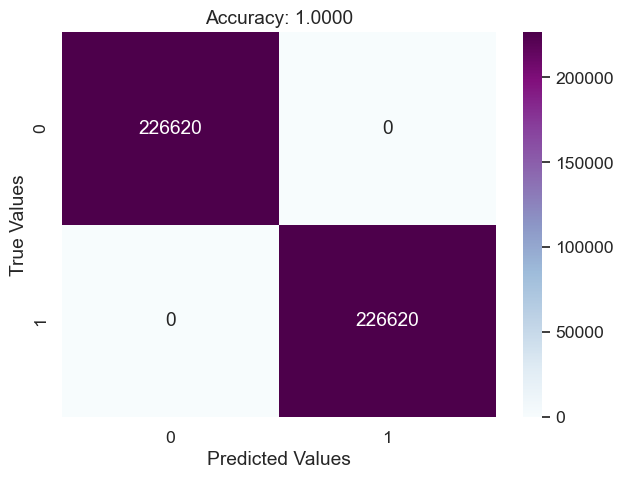



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226620

    accuracy                           1.00    453240
   macro avg       1.00      1.00      1.00    453240
weighted avg       1.00      1.00      1.00    453240



In [416]:
# Train Predictions
Visualize_confusion_matrix(y_train_ros, y_train_pred)

In [417]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_ros, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_ros, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_ros, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_ros, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_ros, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


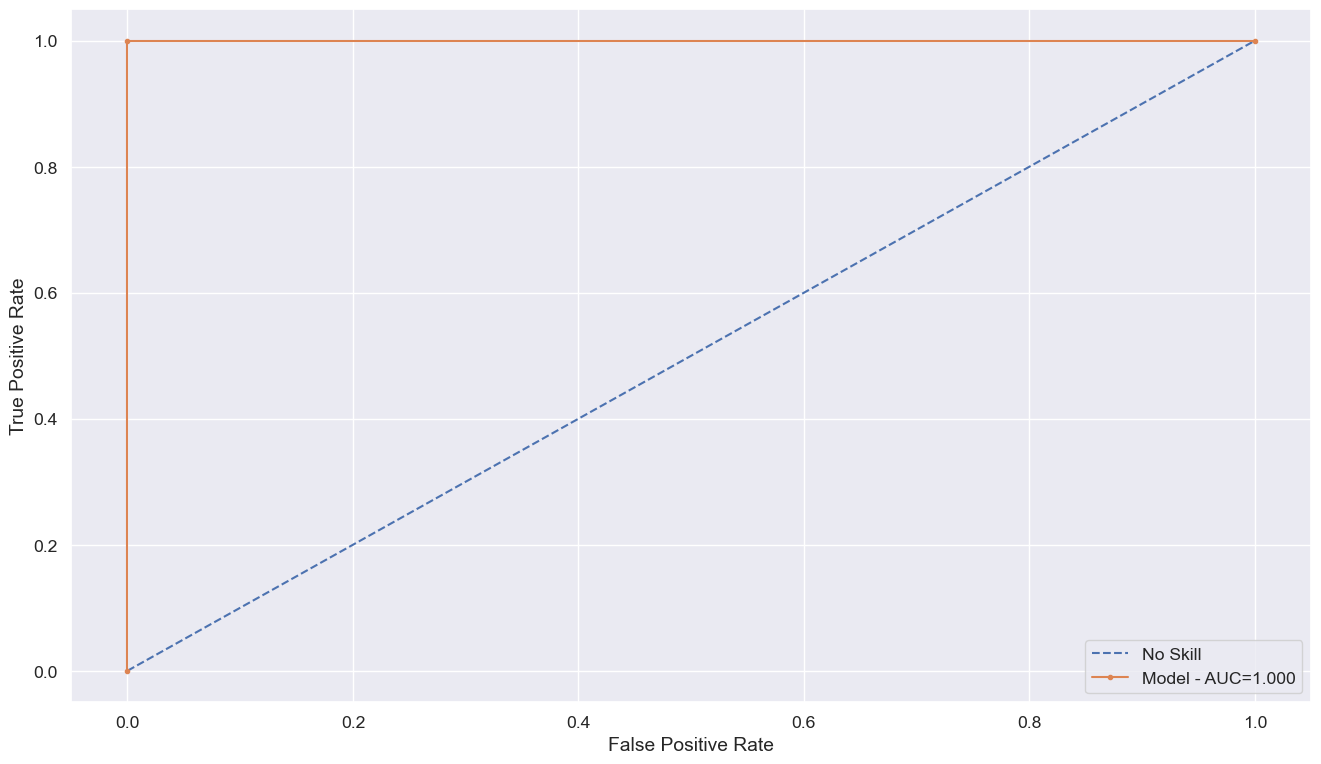

In [418]:
ROC_AUC(y_train_ros, y_train_pred)

### XGBoost Model on the Testing set

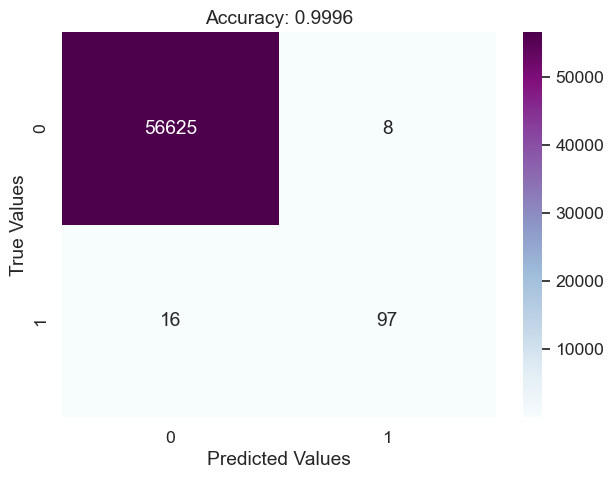



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.92      0.86      0.89       113

    accuracy                           1.00     56746
   macro avg       0.96      0.93      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [419]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_test_pred)

In [420]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8584
Precision score: 0.9238
F1-Score: 0.8899
Accuracy score: 0.9996
AUC: 0.9291


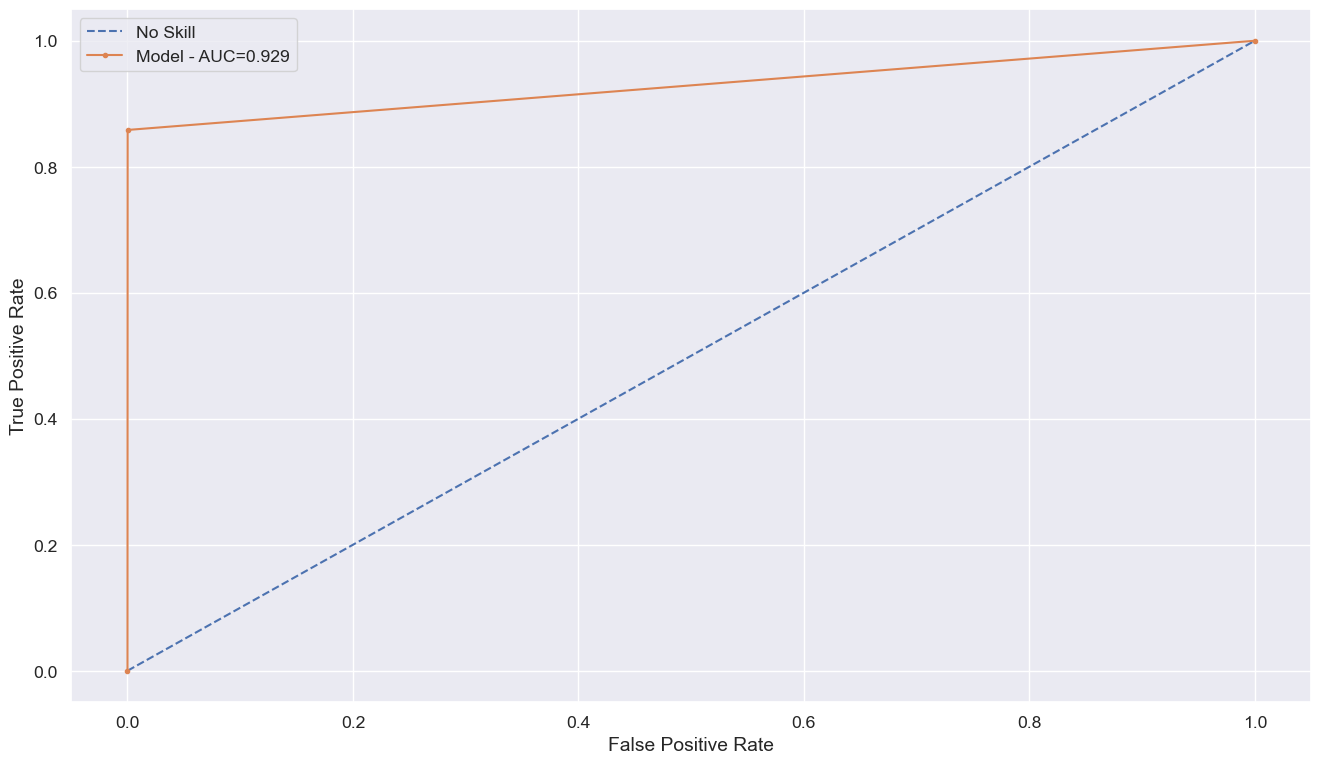

In [421]:
ROC_AUC(y_test, y_test_pred)

# Result

## ROC Curve and Area Under the Curve

### Logistic Regression

In [422]:
y_pred_logistic = LR_model_ros.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

### Decision Tree

In [423]:
y_pred_dtr = DTR_model_ros.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

### Random Forest

In [424]:
y_pred_rfc = RF_model_ros.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

### XGBoost

In [425]:
y_pred_xgb = XGB_model_ros.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

## Plotting Graph

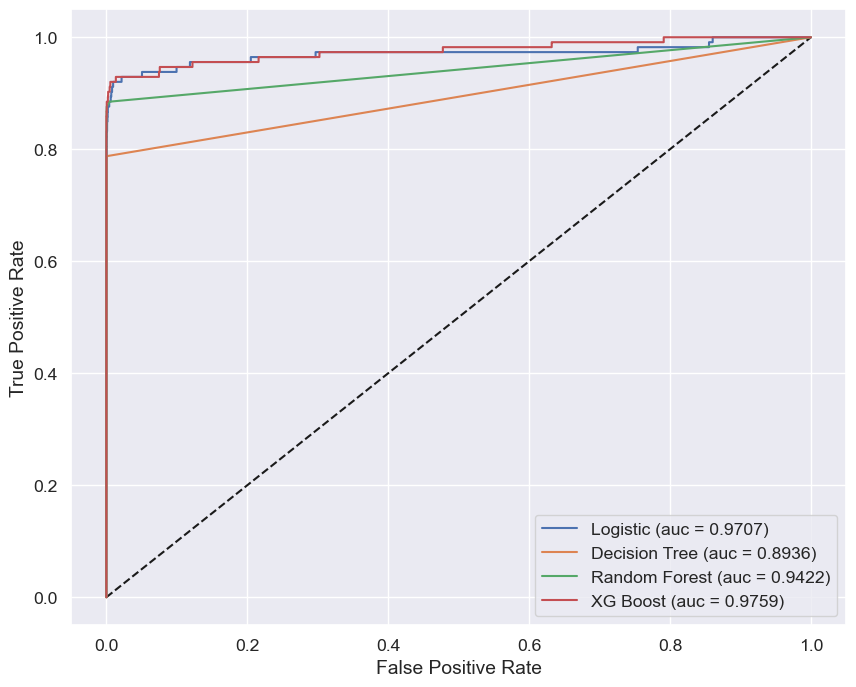

In [426]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.4f)' % auc_logistic)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

# SMOTE (Synthetic Minority Oversampling Technique)

In [427]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [428]:
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [429]:
print('Before SMOTE oversampling X_train shape=', X_train.shape)
print('After SMOTE oversampling X_train shape=', X_train_smote.shape)

Before SMOTE oversampling X_train shape= (226980, 29)
After SMOTE oversampling X_train shape= (453240, 29)


# Logistic Regression

### Logistic Regression Model on the Training set

In [430]:
from sklearn.linear_model import LogisticRegression
LR_model_smote = LogisticRegression(random_state = 0)
LR_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = LR_model_smote.predict(X_train_smote)
y_test_pred = LR_model_smote.predict(X_test)
acc_smote_1 = accuracy_score(y_test, y_test_pred)

In [431]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 0.9196
Precision score: 0.9702
F1-Score: 0.9442
Accuracy score: 0.9457
AUC: 0.9457


### Logistic Regression Model on the Testing set

In [432]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.9292
Precision score: 0.0577
F1-Score: 0.1087
Accuracy score: 0.9697
AUC: 0.9495


# Decision Tree

### Decision Tree Classification Model on Train set

In [433]:
from sklearn.tree import DecisionTreeClassifier
DTR_model_smote = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DTR_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = DTR_model_smote.predict(X_train_smote)
y_test_pred = DTR_model_smote.predict(X_test)
acc_smote_4 = accuracy_score(y_test, y_test_pred)

In [434]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


### Decision Tree Classification Model on the Testing set

In [435]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8584
Precision score: 0.4619
F1-Score: 0.6006
Accuracy score: 0.9977
AUC: 0.9282


# Random Forest

### Random Forest Classification Model on the Training set

In [436]:
from sklearn.ensemble import RandomForestClassifier
RF_model_smote = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RF_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = RF_model_smote.predict(X_train_smote)
y_test_pred = RF_model_smote.predict(X_test)
acc_smote_5 = accuracy_score(y_test, y_test_pred)

In [437]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


### Random Forest Classification Model on the Testing set

In [438]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8496
Precision score: 0.8649
F1-Score: 0.8571
Accuracy score: 0.9994
AUC: 0.9246


# XGBoost

### XGBoost Model on the Training set

In [439]:
from xgboost import XGBClassifier
XGB_model_smote = XGBClassifier()
XGB_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = XGB_model_smote.predict(X_train_smote)
y_test_pred = XGB_model_smote.predict(X_test)
acc_smote_7 = accuracy_score(y_test, y_test_pred)

In [440]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


### XGBoost Model on the Testing set

In [441]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))

Recall score: 0.8584
Precision score: 0.8291
F1-Score: 0.8435
Accuracy score: 0.9994
AUC: 0.9290


# Result

## ROC Curve and Area Under the Curve

In [442]:
from sklearn.metrics import roc_curve, auc

### Logistic Regression

In [443]:
y_pred_logistic = LR_model_smote.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

### Decision Tree

In [444]:
y_pred_dtr = DTR_model_smote.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

### Random Forest

In [445]:
y_pred_rfc = RF_model_smote.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

### XGBoost

In [446]:
y_pred_xgb = XGB_model_smote.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

## Plotting Graph

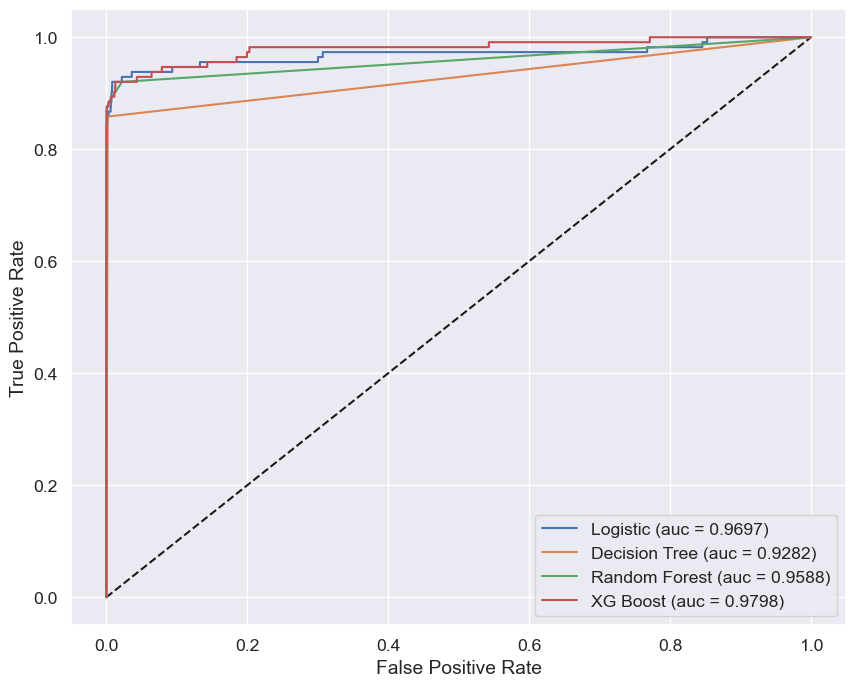

In [447]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.4f)' % auc_logistic)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

*Since balanced data wont be appropriate. Therefore, we will be choosing the best model on the imbalanced data*

*The best performing are Logistic and XGBoost. But as XGBoost requires more resources than the Logistic model. Therefore, building the XGBoost model is more expensive than the Logistic model.* 

*Therefore, we will consider Logistic Regession.*

In [448]:
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [449]:
test_case_list = [239.93, -2.303349568, 1.75924746, -0.359744743, 2.330243051, -0.821628328, -0.075787571, 0.562319782, -0.399146578, -0.238253368, -1.525411627, 2.032912158, -6.560124295, 0.022937323, -1.470101536, -0.698826069, -2.282193829, -4.781830856, -2.615664945, -1.334441067, -0.430021867, -0.294166318, -0.932391057, 0.172726296, -0.087329538, -0.156114265, -0.542627889, 0.039565989, -0.153028797]
test_case_df = pd.DataFrame(test_case_list)               
test_case = test_case_df.T                                
test_case_prediction = LR_model.predict(test_case)           
if(test_case_prediction == 0):                            
    print('The Transaction was Legit')
else:
    print('The Transaction was Fraud.')

The Transaction was Fraud.
